# Stock Returns Prediction with Supervised Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [5]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

Fundamental data were downloaded from Capital IQ to be used as features to predict effective annual return (from 4-Jan-2010 to 2-Jan-2020). These fundamental data are for financial year ending 2009 updated as at 01-Apr-2023 (date of retrieval of data), and are in USD (for monetary figures - using historical exchange rates) or % (for ratios). <br> <br>
The fundamental data (29 metrics in total) obtained from Capital IQ have the following definitions: <br>
**IQ_TOTAL_REV**: Revenues + Other Revenues, Total	<br>
**IQ_RETURN_ASSETS**: EBIT * (1-0.375) / Average Total Assets	<br>
**IQ_RETURN_EQUITY**:	Earnings from Continuing Operations / Average Total Equity<br>
**IQ_GROSS_MARGIN**: Gross Profit / Total Revenues <br>
**IQ_EBITDA_MARGIN**: EBITDA / Total Revenues	<br>
**IQ_NI_MARGIN**: Net Income / Total Revenues	<br>
**IQ_AUDITOR_OPINION**: Auditor Opinion	<br>
**IQ_ASSET_TURNS**: Total Revenues / Average Total Assets	<br>
**IQ_CURRENT_RATIO**: Total Current Assets / Total Current Liabilities	<br>
**IQ_DAYS_SALES_OUT**: Average Accounts Receivable / Revenues * 360	<br>
**IQ_DAYS_INVENTORY_OUT**: Average Inventory / Cost of Goods Sold * 360	<br>
**IQ_DAYS_PAYABLE_OUT**: Average Accounts Payable / (Cost of Goods Sold - Beginning Inventory + Ending Inventory) * Number of Days in the Period	<br>
**IQ_TOTAL_DEBT_EQUITY**: Total Debt / Total Equity	<br>
**IQ_TOTAL_REV_1YR_ANN_GROWTH**: Total Revenues (t) / Total Revenues (t-1) - 1	<br>
**IQ_NI_1YR_ANN_GROWTH**: Net Income (t) / Net Income (t-1) -1	<br>
**IQ_CFO_1YR_ANN_GROWTH**: Cash from Operations (t) / Cash from Operations (t-1) -1	<br>
**IQ_TOTAL_ASSETS_1YR_ANN_GROWTH**: Total Assets (t) / Total Assets (t-1) -1	<br>
**IQ_EBITDA**: EBITDA	<br>
**IQ_PAYOUT_RATIO**: (Common Dividends Paid + Preferred Dividends Paid) / Net Income	<br>
**IQ_CASH_ST_INVEST**: Cash and Equivalents + Short Term Investments + Trading Asset Securities	<br>
**IQ_NPPE**: Gross Property Plant and Equipment + Accumulated Depreciation	<br>
**IQ_GW**: Goodwill	<br>
**IQ_RE**: Retained Earnings	<br>
**IQ_TBV**: Book Value of Common Equity - Goodwill = Other Intangibles - Fin. Div. Goodwill - Fin. Div. Other Intangibles	<br>
**IQ_NET_DEBT**: Total Debt - Total Cash and Short Term Investments - Long Term Marketable Securities	<br>
**IQ_CONTINGENT_LIABILITIES**: Contingent Liabilites <br>
**IQ_CASH_OPER**: Cash from Operations <br>
**IQ_CASH_INVEST**: Cash from Investing <br>
**IQ_NET_CHANGE**: Cash from Operations + Cash from Investing + Cash from Financing + Foreign Exchange Rate Adjustments + Misc. Cash Flow Adjustments

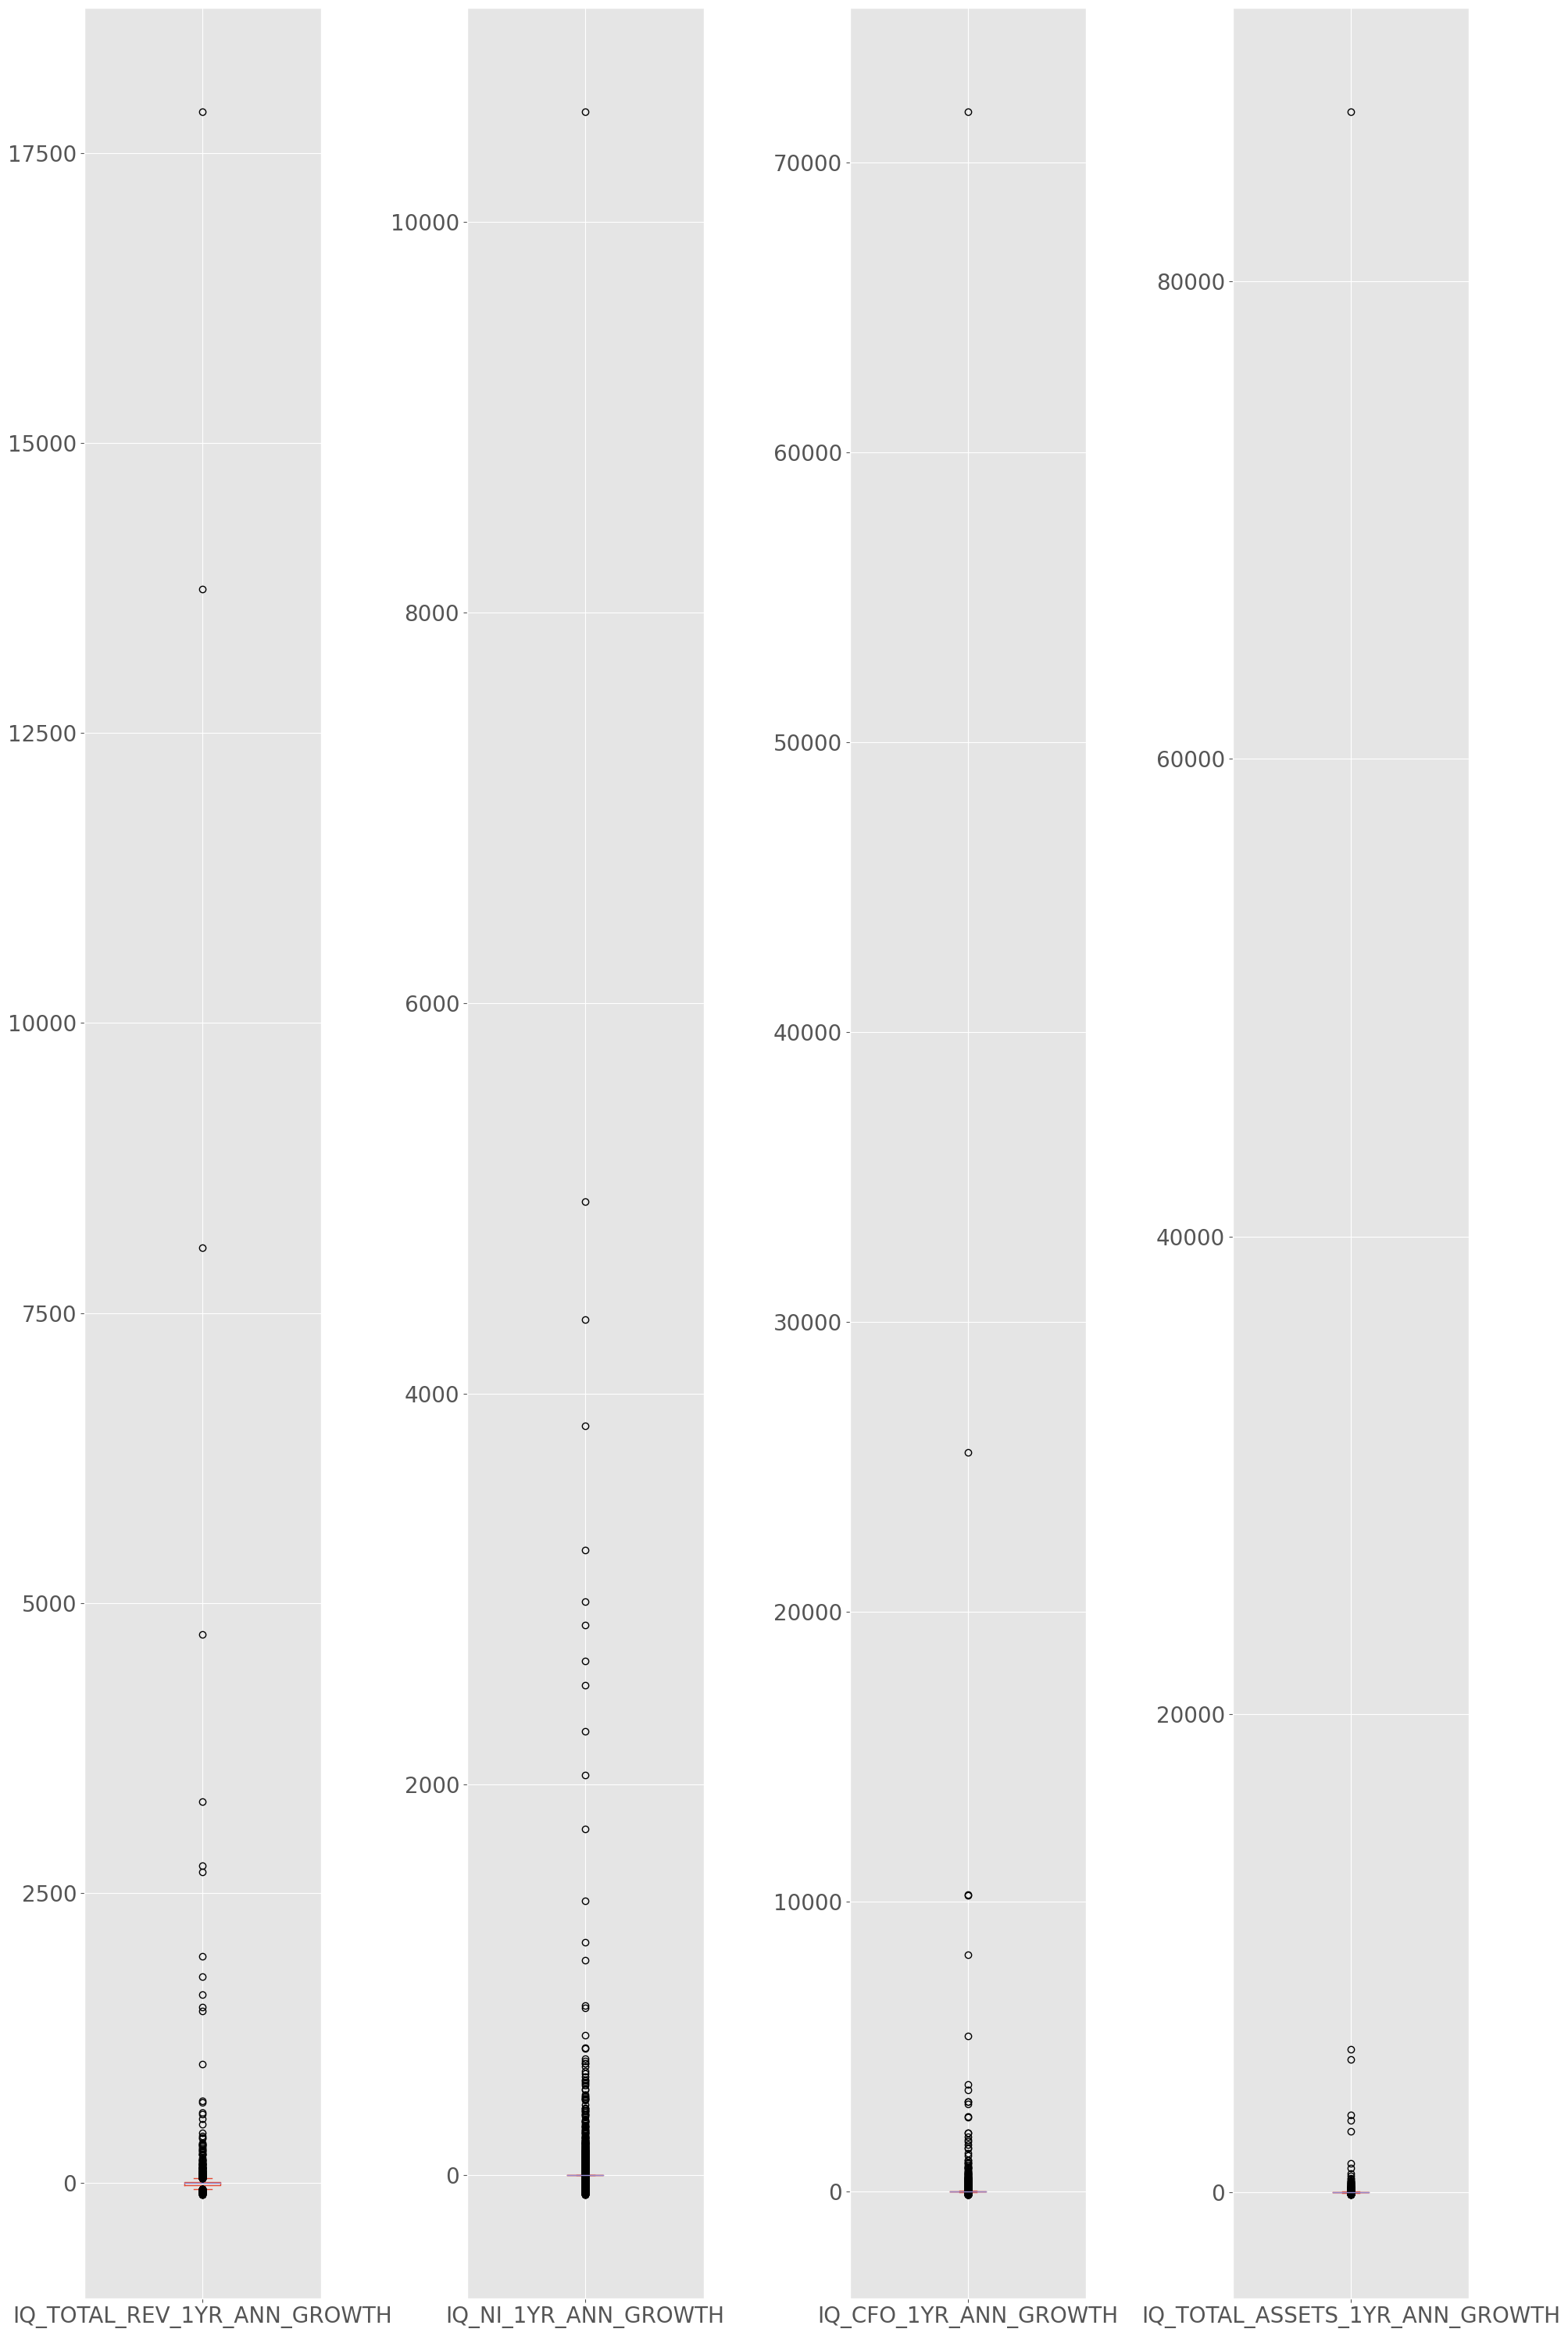

In [6]:
stockdata[['IQ_TOTAL_REV_1YR_ANN_GROWTH','IQ_NI_1YR_ANN_GROWTH','IQ_CFO_1YR_ANN_GROWTH','IQ_TOTAL_ASSETS_1YR_ANN_GROWTH']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Effective annual return against 1yr revenue growth')

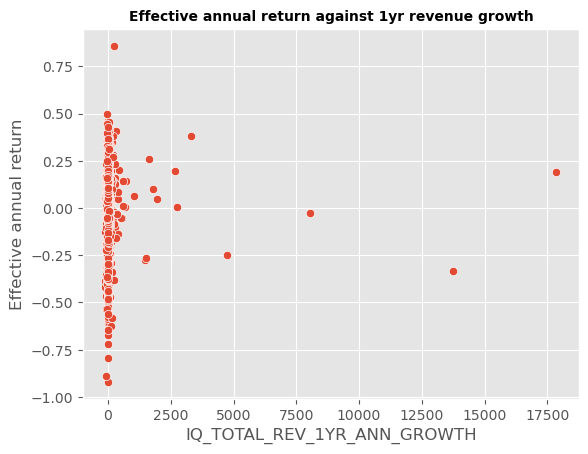

In [7]:
fig=sns.scatterplot(x='IQ_TOTAL_REV_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against 1yr revenue growth', fontdict={'size': 10, 'weight': 'bold'})

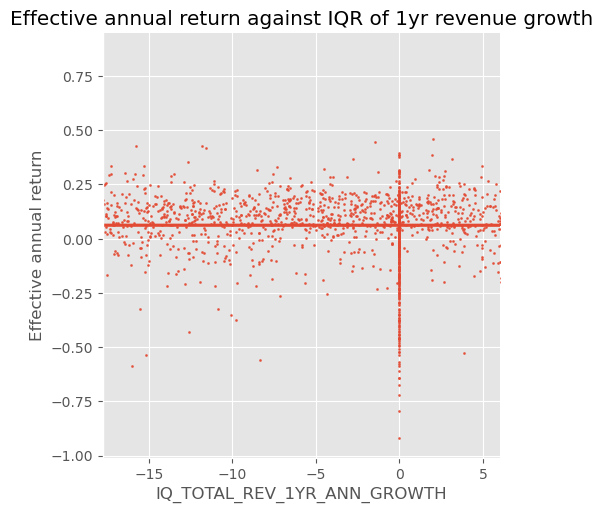

In [8]:
fig=sns.lmplot(x='IQ_TOTAL_REV_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_TOTAL_REV_1YR_ANN_GROWTH'],[25,75]))
fig.set(title='Effective annual return against IQR of 1yr revenue growth')

Text(0.5, 1.0, 'Effective annual return against 1yr net profit growth')

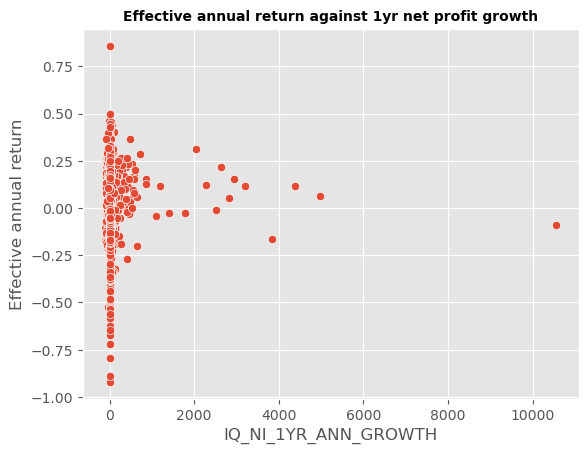

In [10]:
fig=sns.scatterplot(x='IQ_NI_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against 1yr net profit growth', fontdict={'size': 10, 'weight': 'bold'})

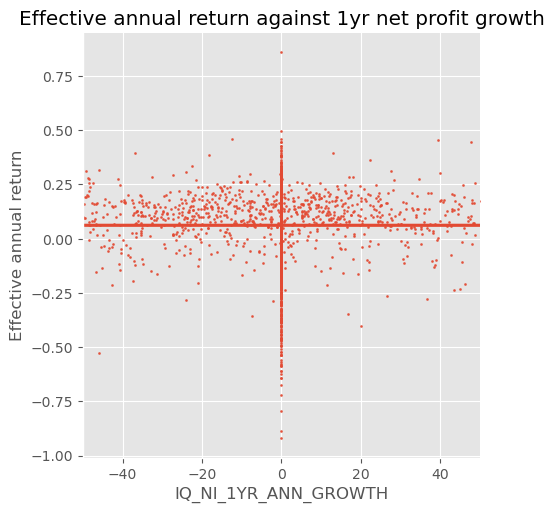

In [25]:
fig=sns.lmplot(x='IQ_NI_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=(-50,50))
fig.set(title='Effective annual return against 1yr net profit growth')

Text(0.5, 1.0, 'Effective annual return against 1yr cash flow from operations growth')

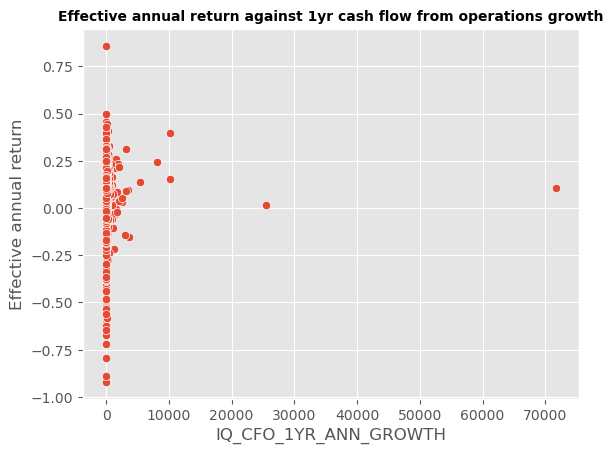

In [24]:
fig=sns.scatterplot(x='IQ_CFO_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against 1yr cash flow from operations growth', fontdict={'size': 10, 'weight': 'bold'})

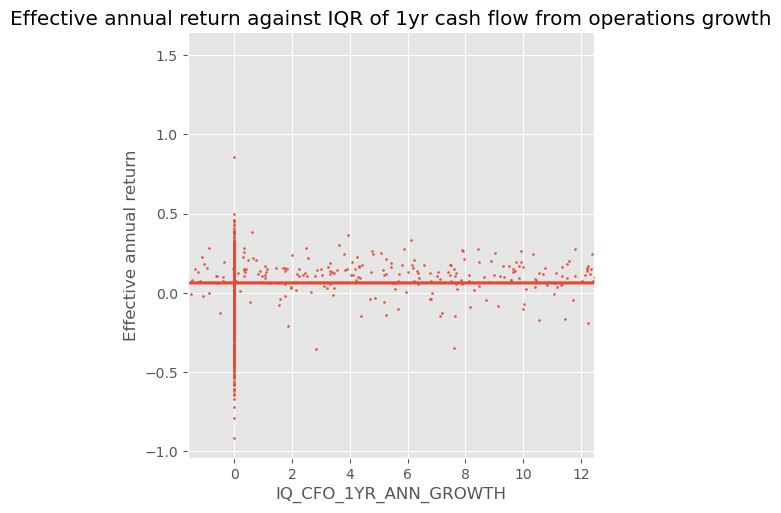

In [26]:
fig=sns.lmplot(x='IQ_CFO_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_CFO_1YR_ANN_GROWTH'],[25,75]))
fig.set(title='Effective annual return against IQR of 1yr cash flow from operations growth')

Text(0.5, 1.0, 'Effective annual return against 1yr asset growth')

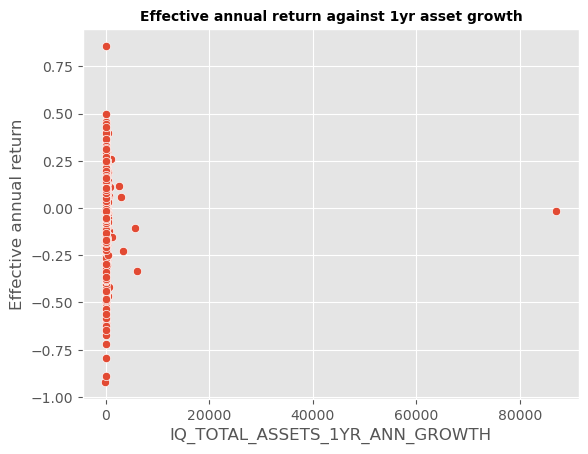

In [27]:
fig=sns.scatterplot(x='IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against 1yr asset growth', fontdict={'size': 10, 'weight': 'bold'})

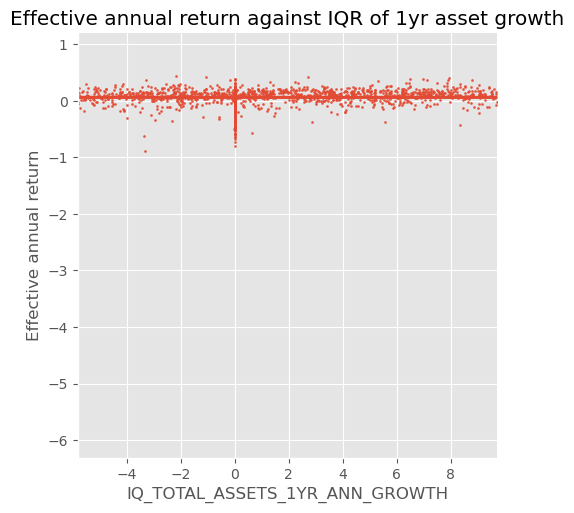

In [28]:
fig=sns.lmplot(x='IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_TOTAL_ASSETS_1YR_ANN_GROWTH'],[25,75]))
fig.set(title='Effective annual return against IQR of 1yr asset growth')

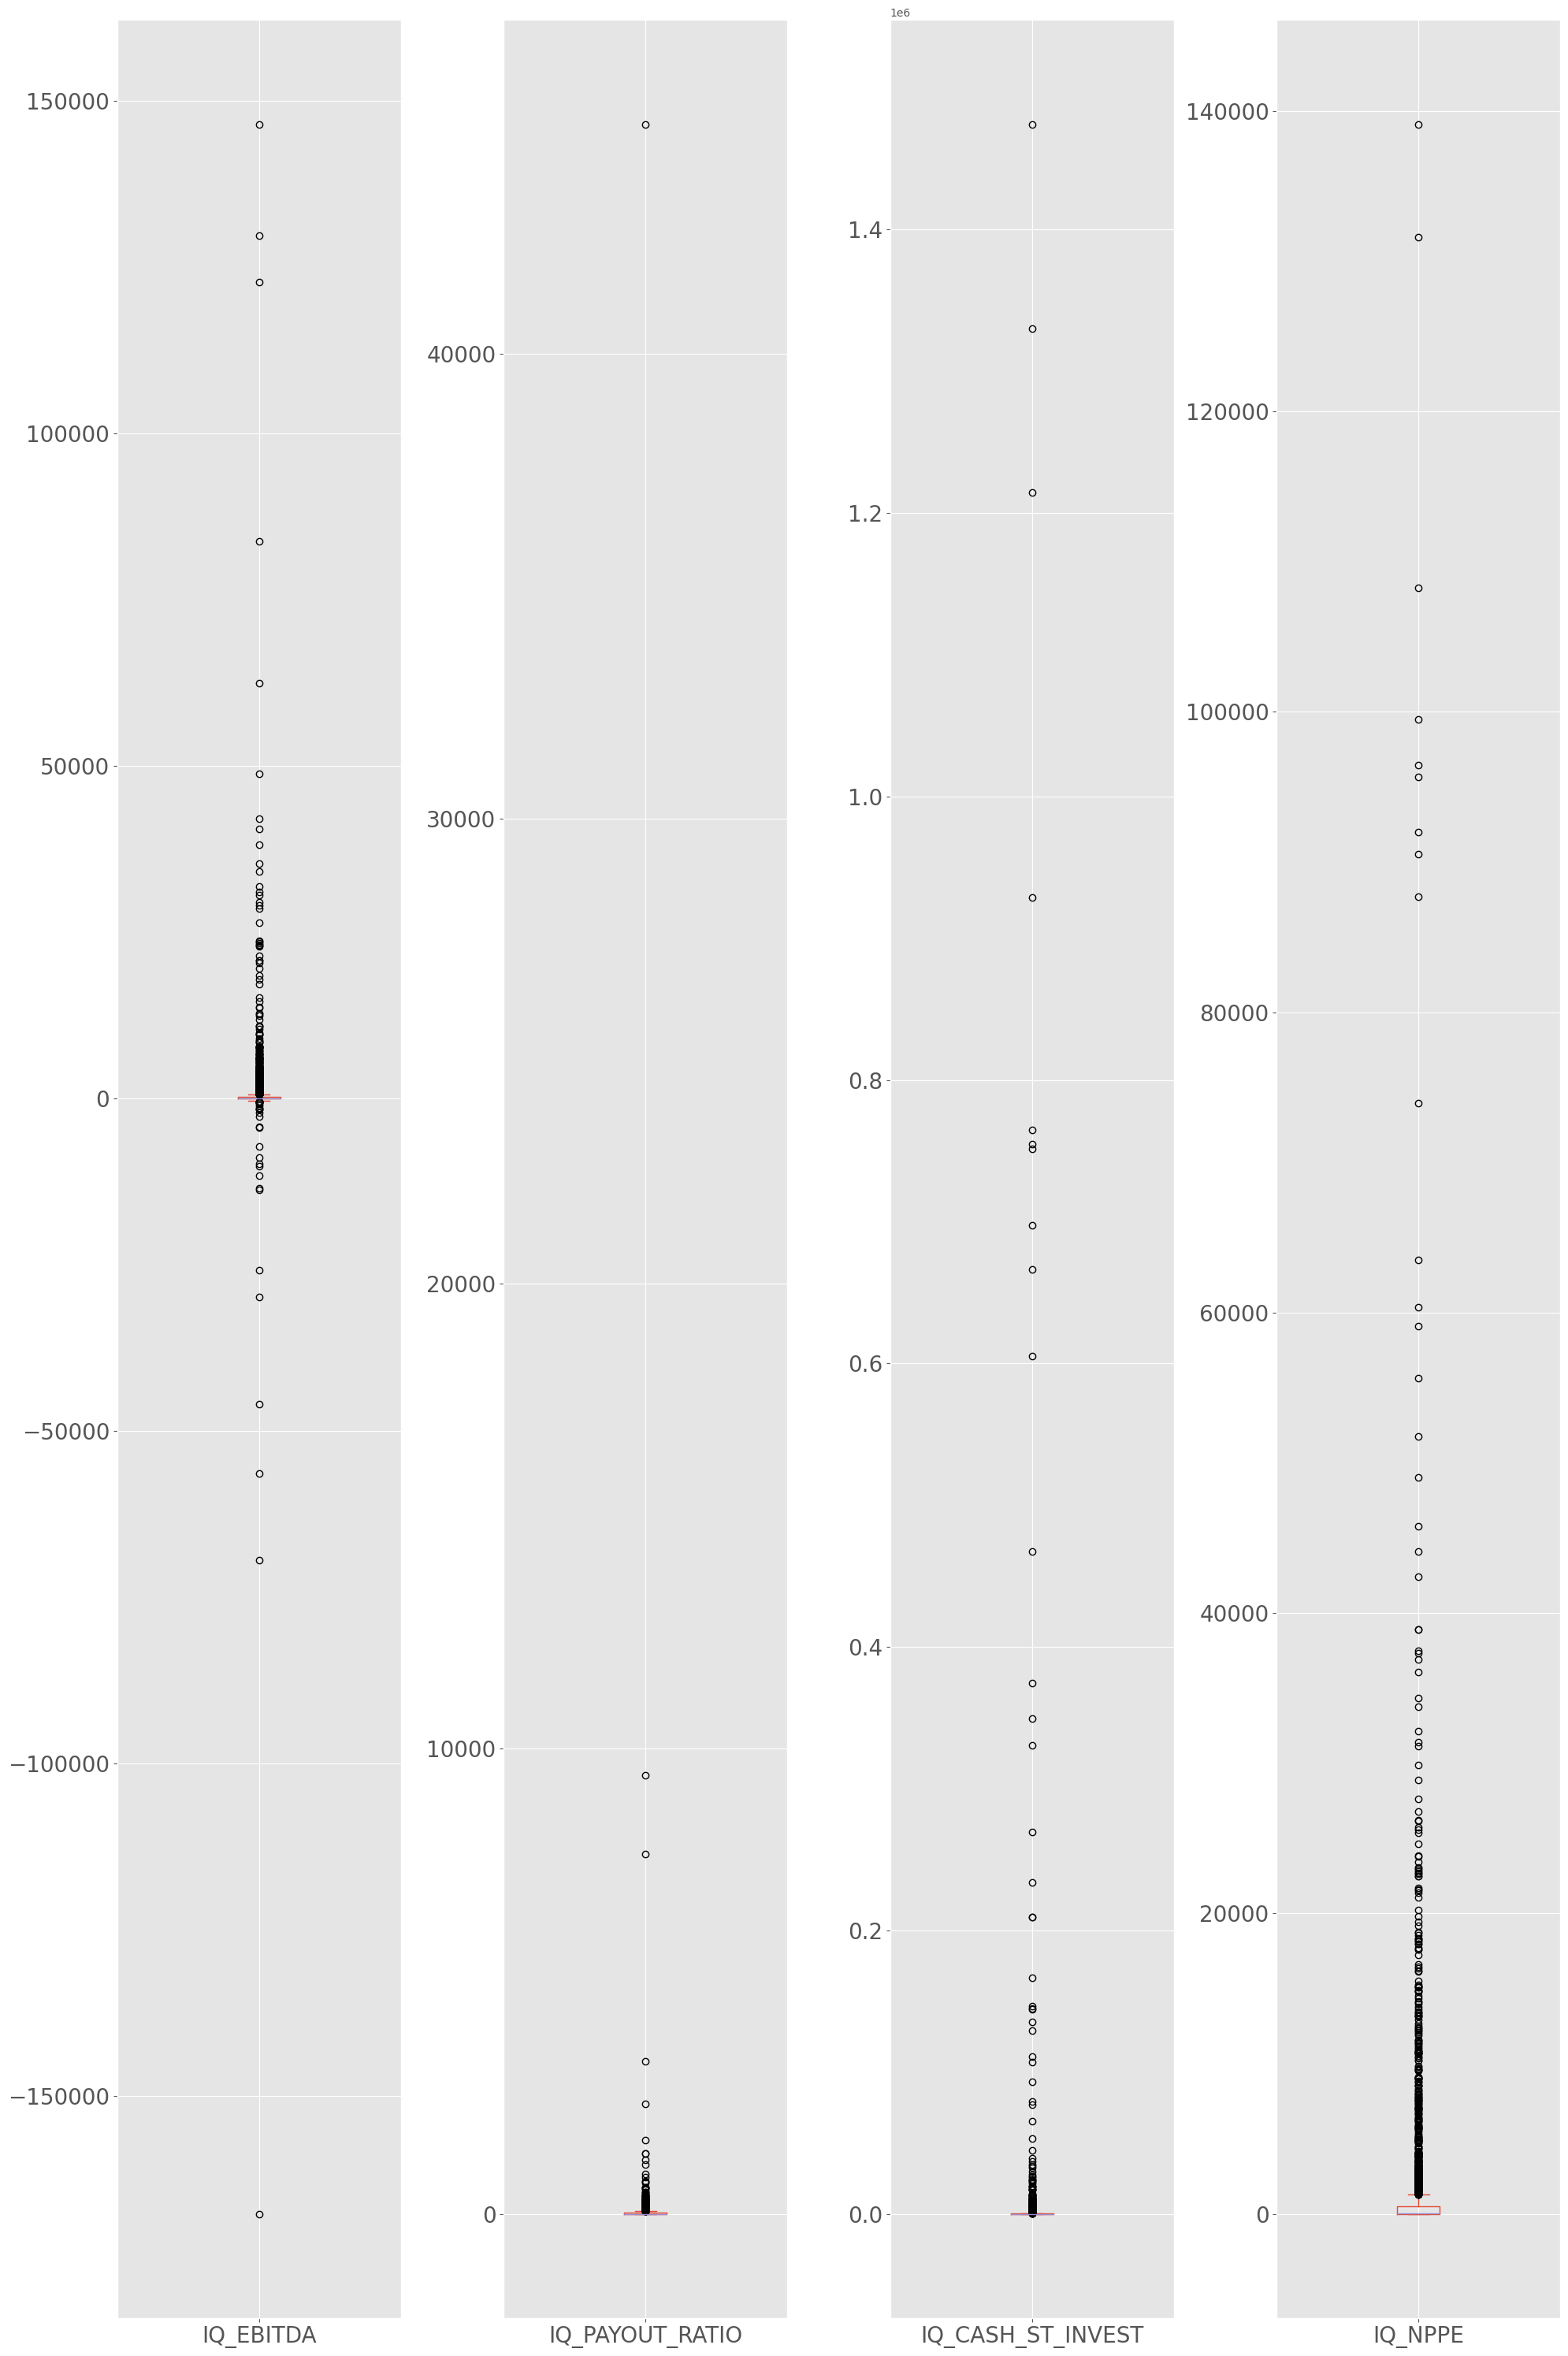

In [29]:
stockdata[['IQ_EBITDA','IQ_PAYOUT_RATIO','IQ_CASH_ST_INVEST','IQ_NPPE']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Effective annual return against EBITDA')

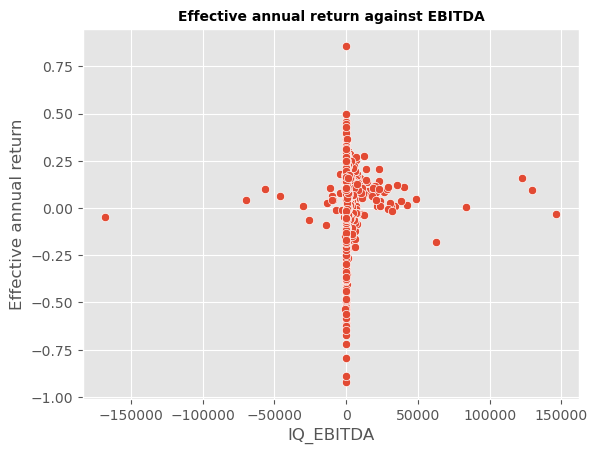

In [33]:
fig=sns.scatterplot(x='IQ_EBITDA', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against EBITDA', fontdict={'size': 10, 'weight': 'bold'})

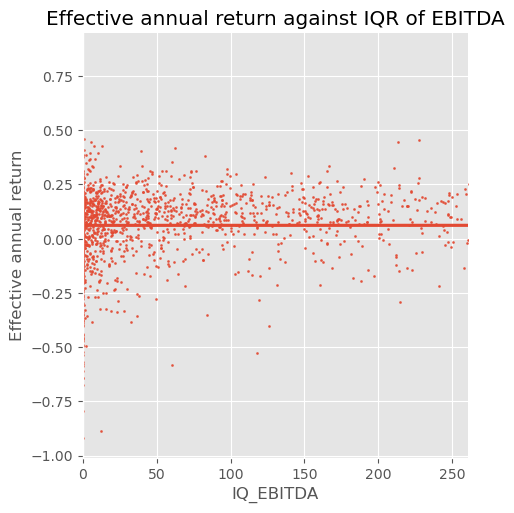

In [34]:
fig=sns.lmplot(x='IQ_EBITDA', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_EBITDA'],[25,75]))
fig.set(title='Effective annual return against IQR of EBITDA')

Text(0.5, 1.0, 'Effective annual return against payout ratio')

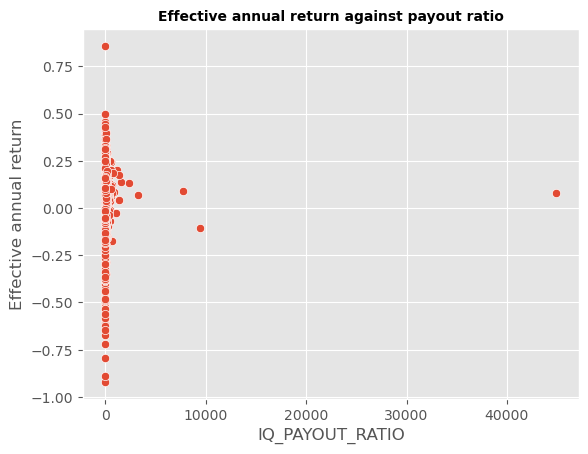

In [35]:
fig=sns.scatterplot(x='IQ_PAYOUT_RATIO', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against payout ratio', fontdict={'size': 10, 'weight': 'bold'})

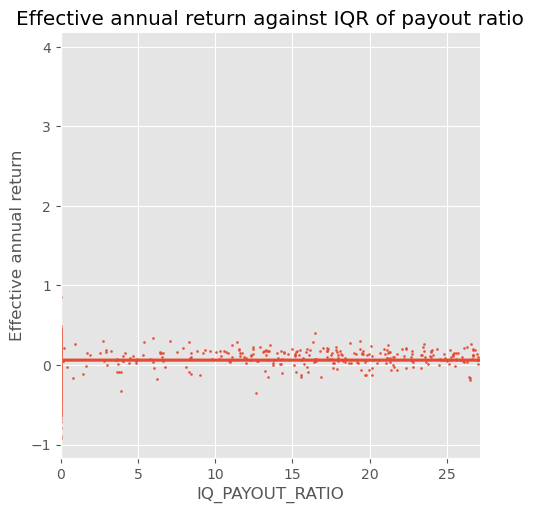

In [36]:
fig=sns.lmplot(x='IQ_PAYOUT_RATIO', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_PAYOUT_RATIO'],[25,75]))
fig.set(title='Effective annual return against IQR of payout ratio')

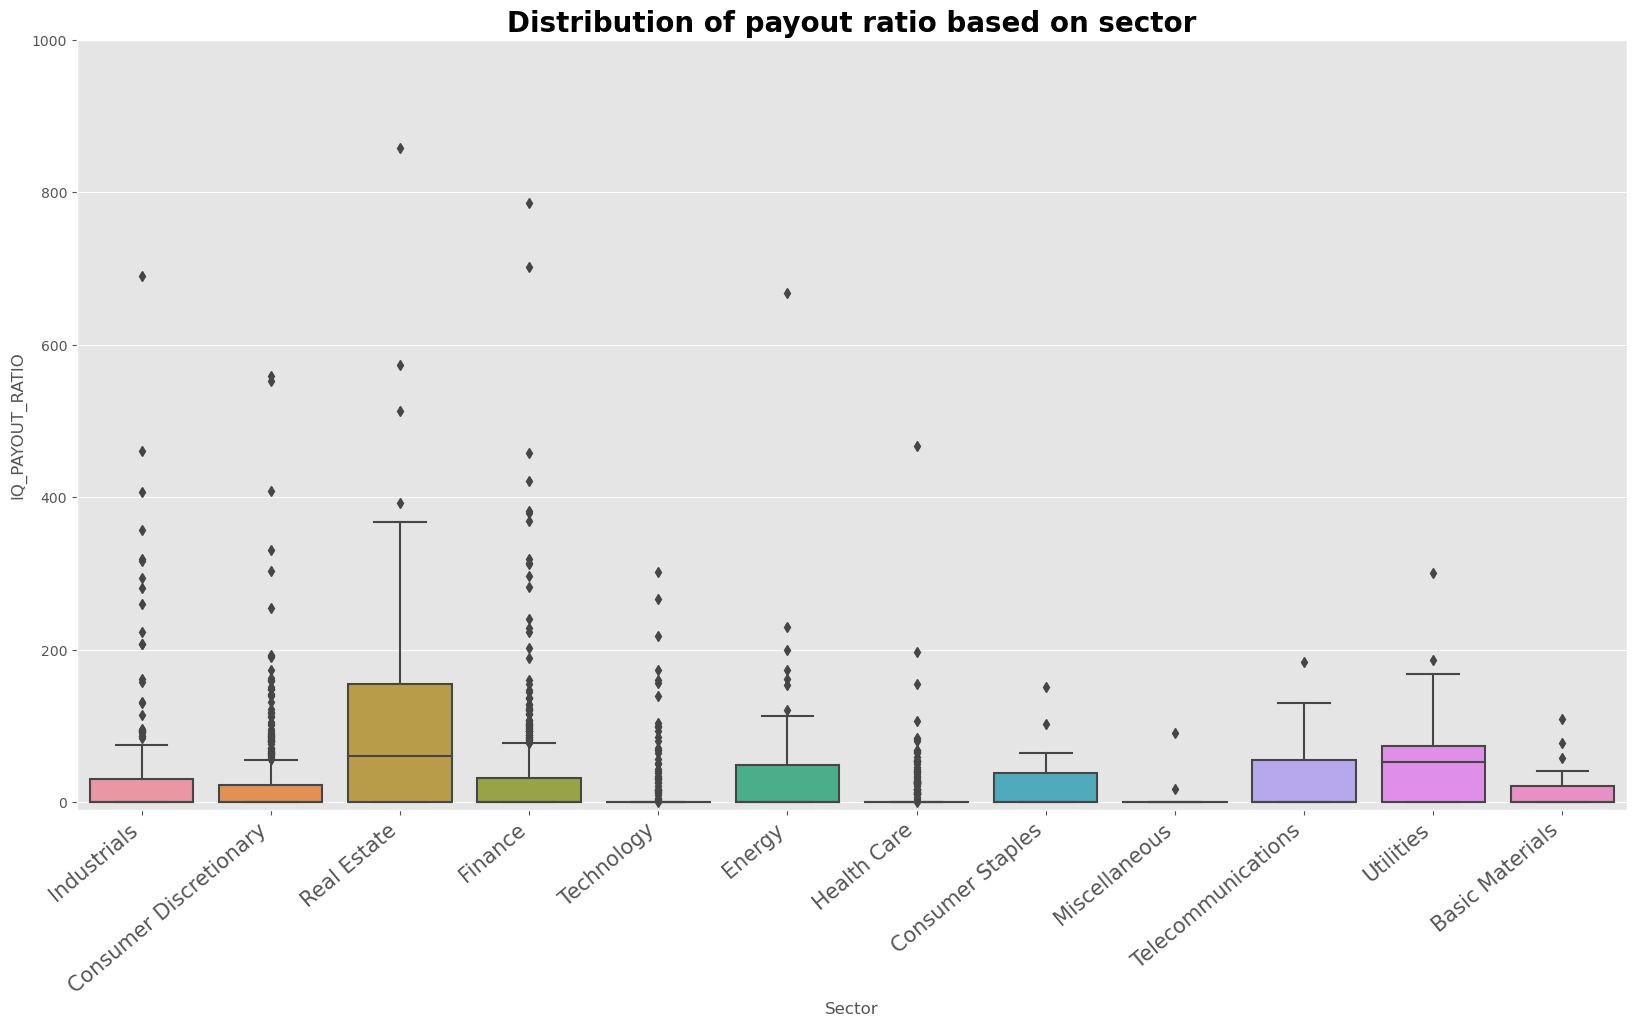

In [39]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_PAYOUT_RATIO', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-10,1000)
fig.set_title('Distribution of payout ratio based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against cash and short term investments')

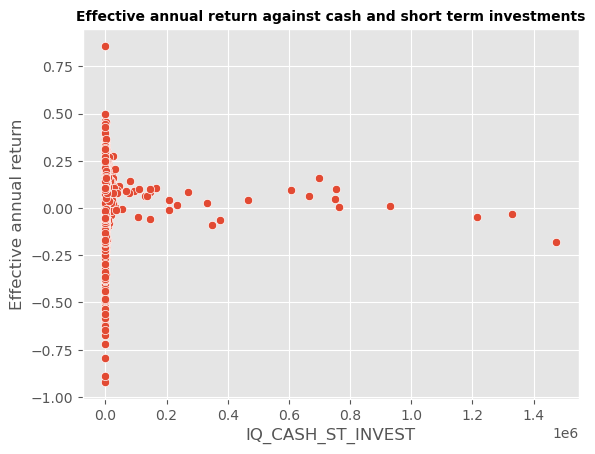

In [41]:
fig=sns.scatterplot(x='IQ_CASH_ST_INVEST', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against cash and short term investments', fontdict={'size': 10, 'weight': 'bold'})

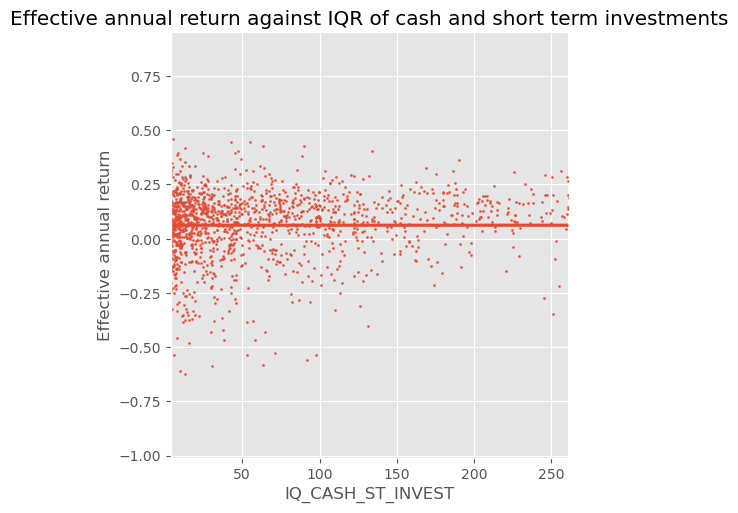

In [43]:
fig=sns.lmplot(x='IQ_CASH_ST_INVEST', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_CASH_ST_INVEST'],[25,75]))
fig.set(title='Effective annual return against IQR of cash and short term investments')

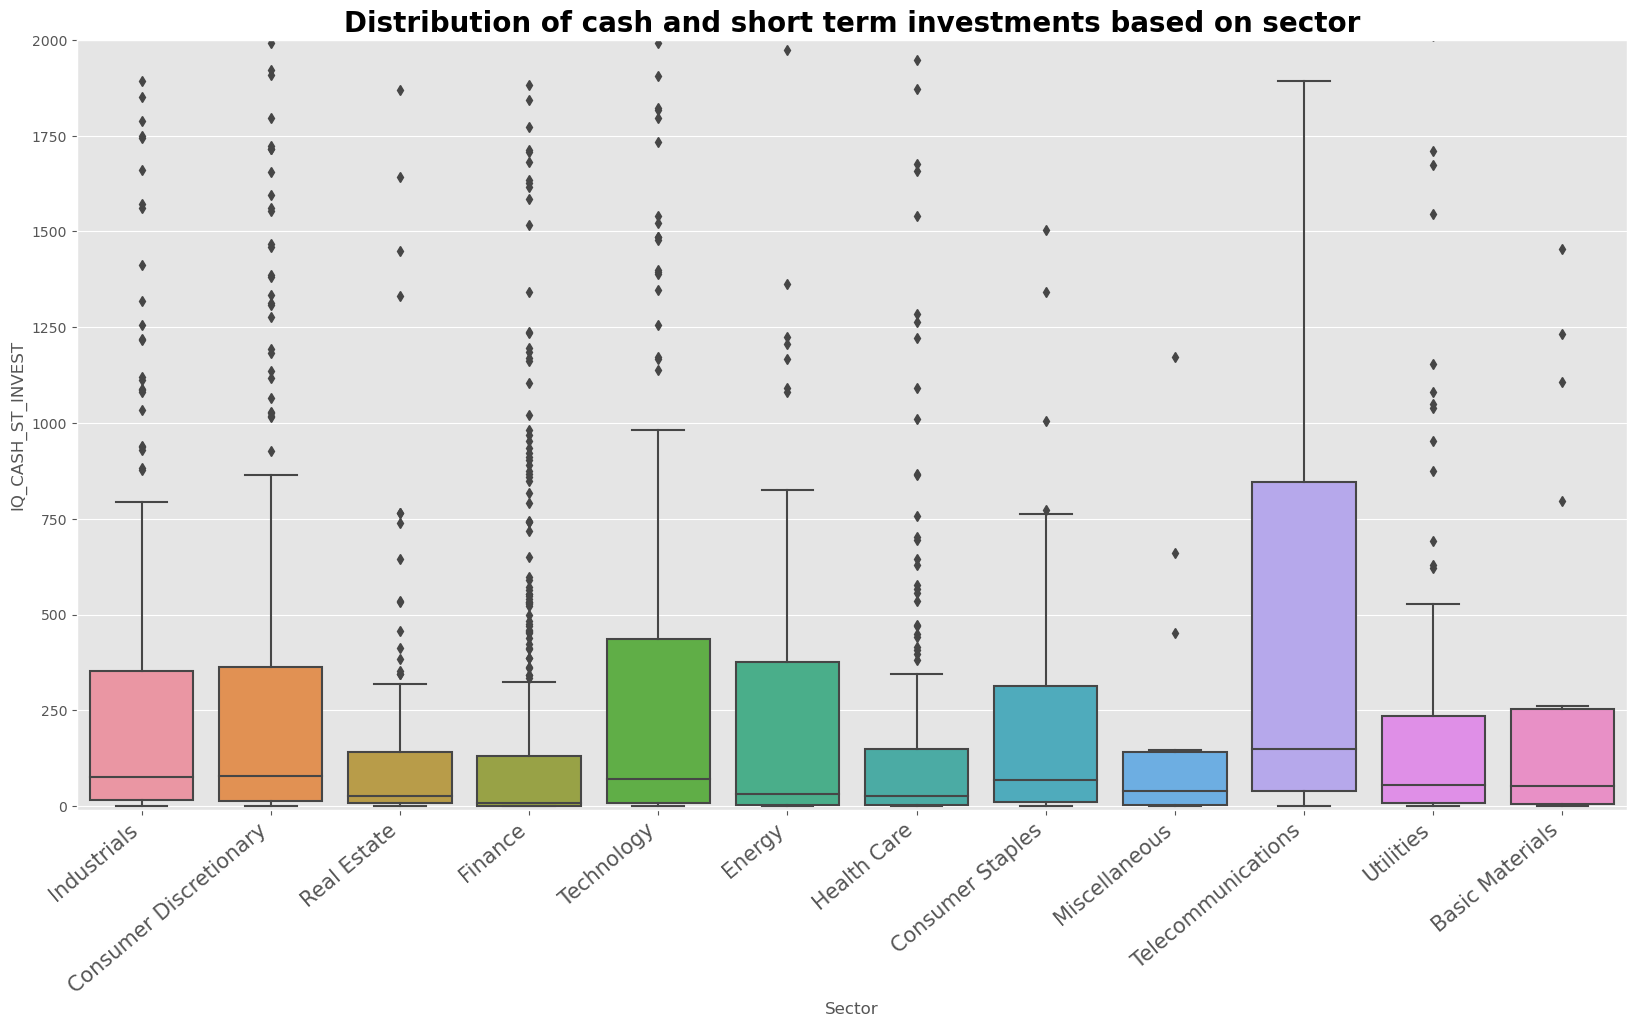

In [55]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_CASH_ST_INVEST', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-10,2000)
fig.set_title('Distribution of cash and short term investments based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against net PPE')

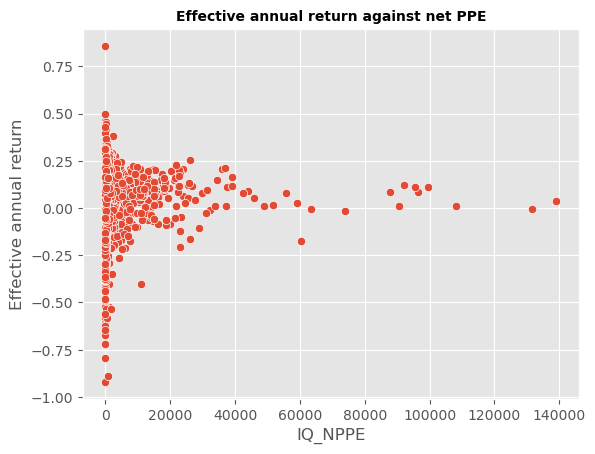

In [44]:
fig=sns.scatterplot(x='IQ_NPPE', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against net PPE', fontdict={'size': 10, 'weight': 'bold'})

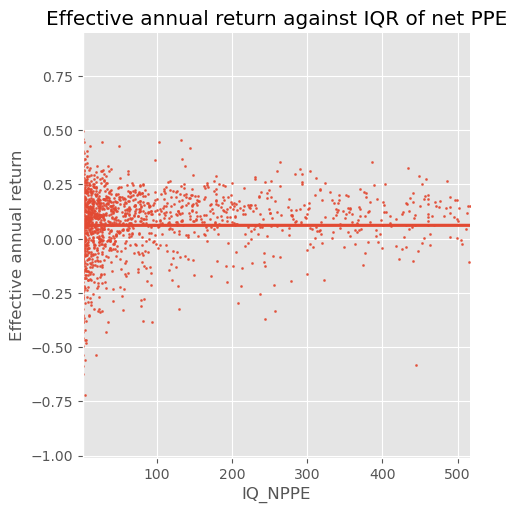

In [45]:
fig=sns.lmplot(x='IQ_NPPE', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_NPPE'],[25,75]))
fig.set(title='Effective annual return against IQR of net PPE')

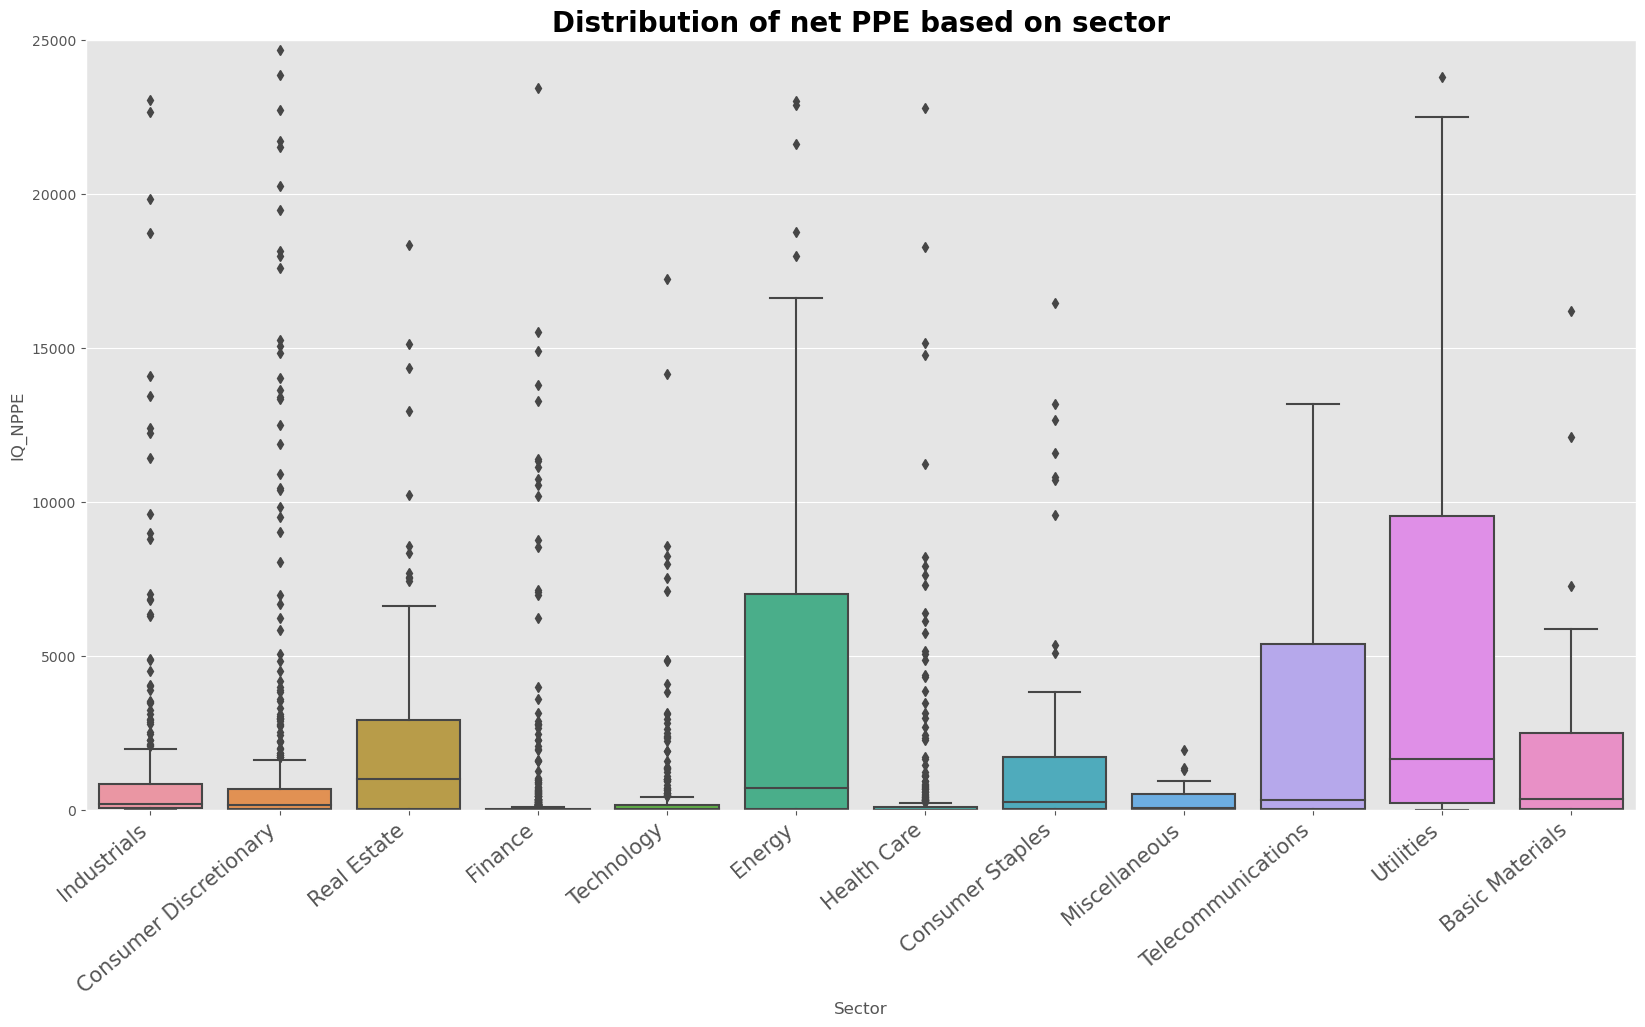

In [48]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_NPPE', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-5,25000)
fig.set_title('Distribution of net PPE based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

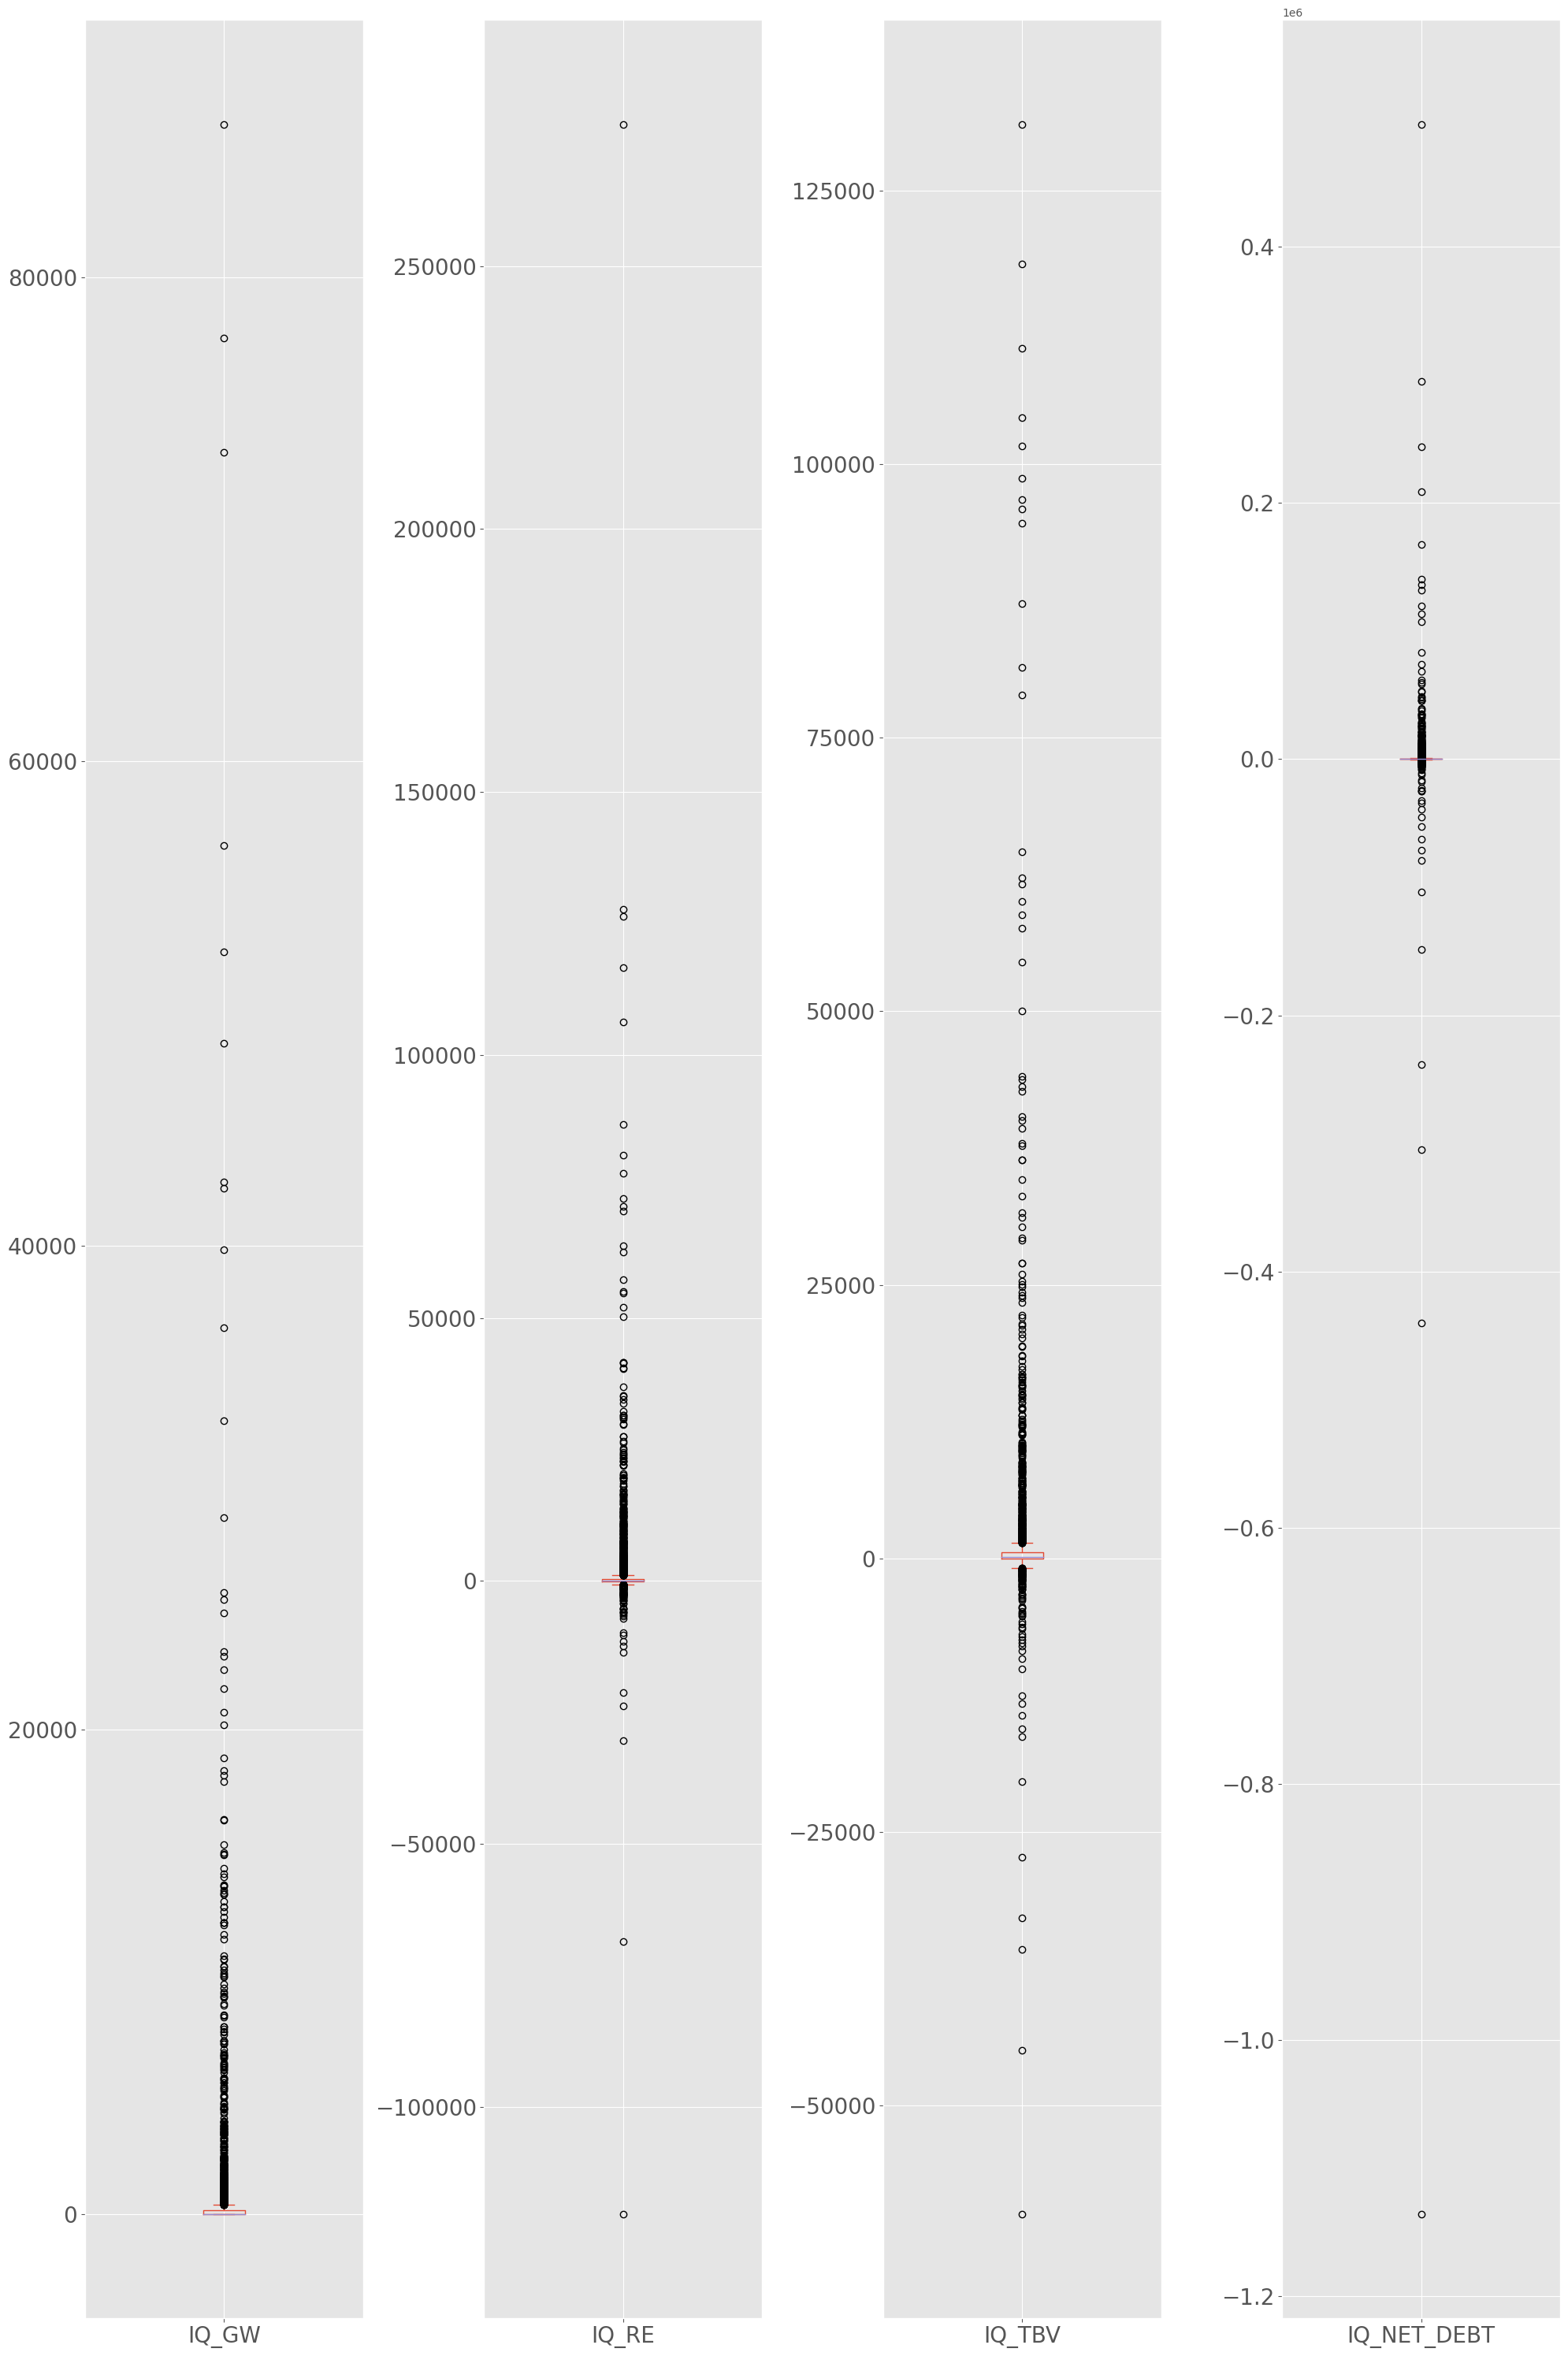

In [30]:
stockdata[['IQ_GW','IQ_RE','IQ_TBV','IQ_NET_DEBT']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Effective annual return against goodwill')

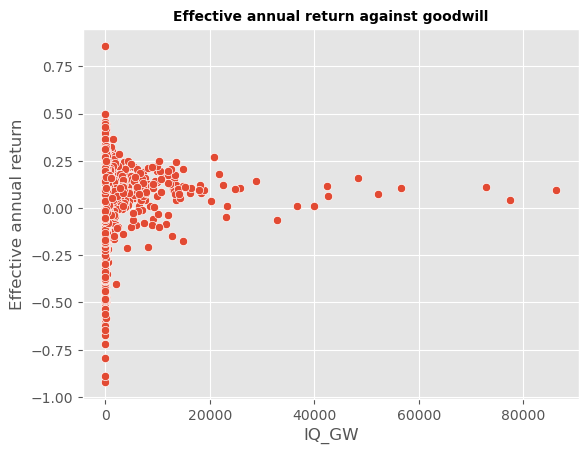

In [56]:
fig=sns.scatterplot(x='IQ_GW', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against goodwill', fontdict={'size': 10, 'weight': 'bold'})

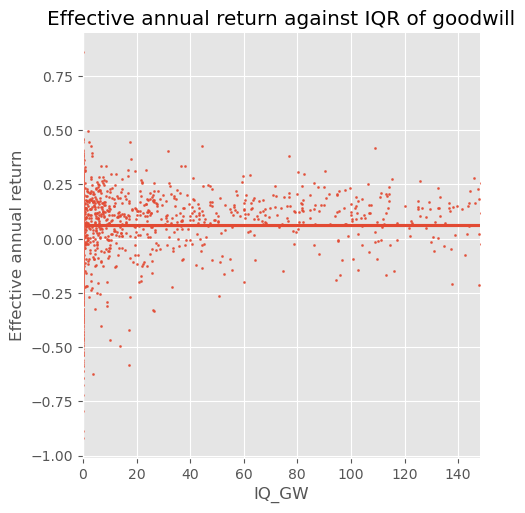

In [57]:
fig=sns.lmplot(x='IQ_GW', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_GW'],[25,75]))
fig.set(title='Effective annual return against IQR of goodwill')

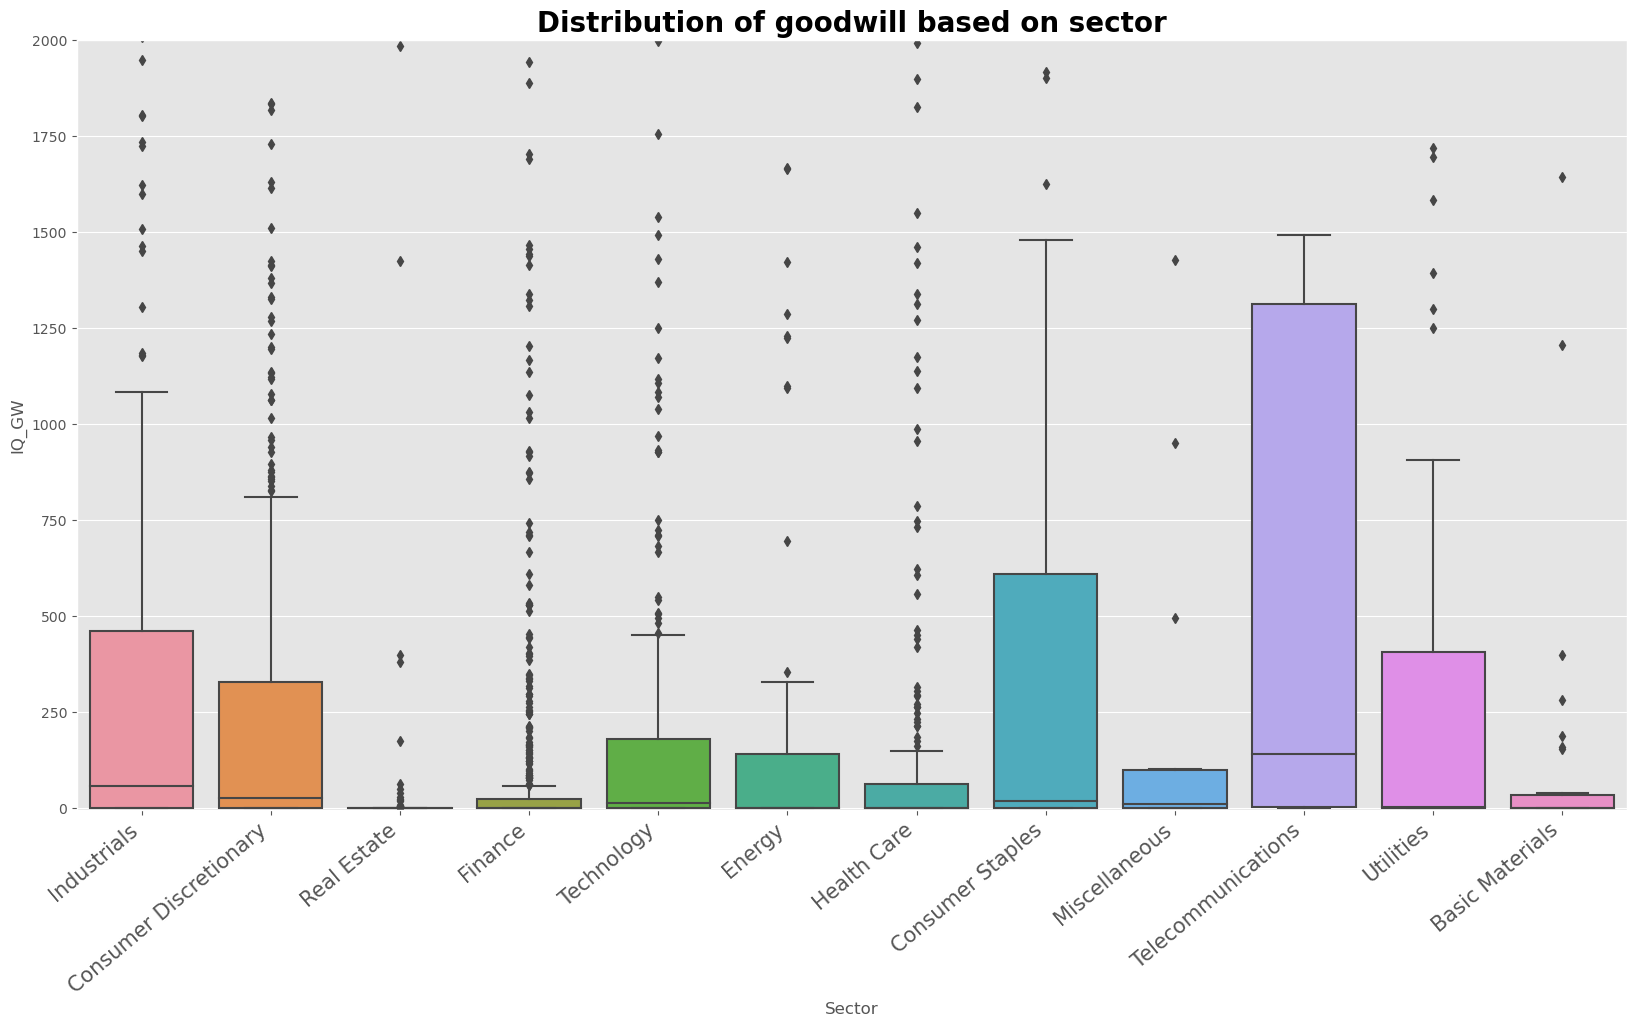

In [61]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_GW', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-5,2000)
fig.set_title('Distribution of goodwill based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against retained earnings')

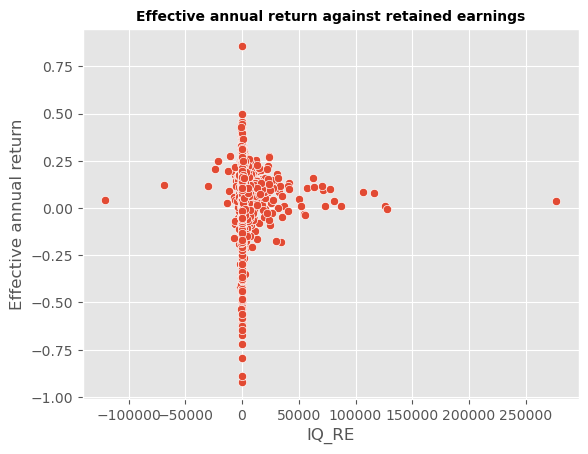

In [62]:
fig=sns.scatterplot(x='IQ_RE', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against retained earnings', fontdict={'size': 10, 'weight': 'bold'})

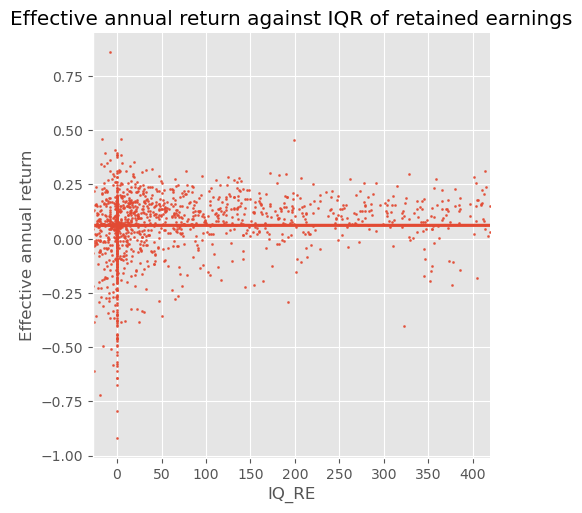

In [63]:
fig=sns.lmplot(x='IQ_RE', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_RE'],[25,75]))
fig.set(title='Effective annual return against IQR of retained earnings')

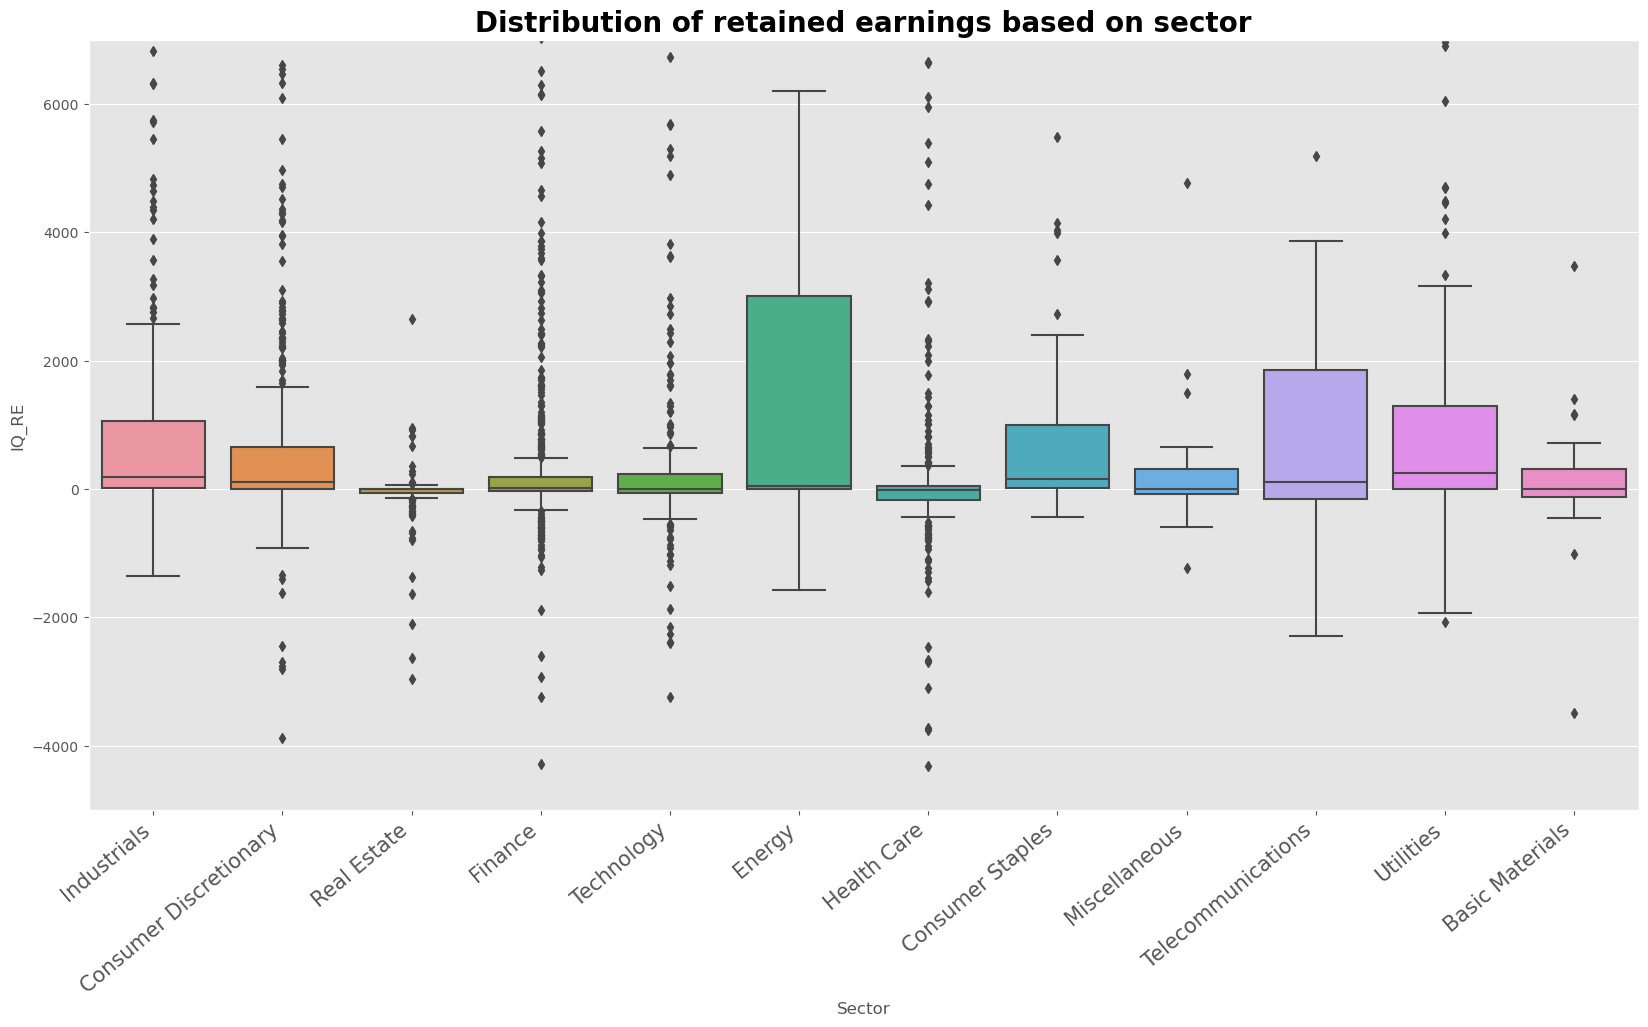

In [67]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_RE', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-5000,7000)
fig.set_title('Distribution of retained earnings based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against tangible book value')

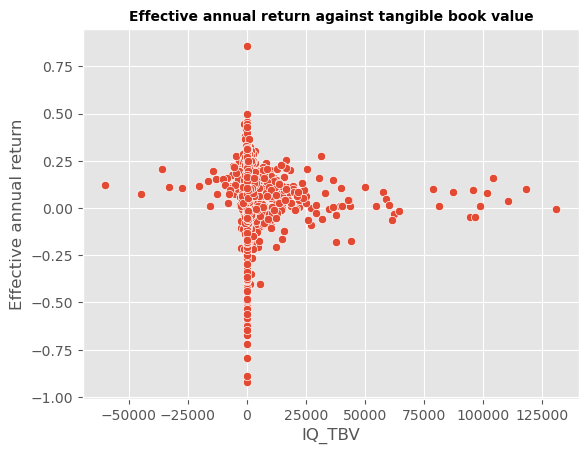

In [68]:
fig=sns.scatterplot(x='IQ_TBV', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against tangible book value', fontdict={'size': 10, 'weight': 'bold'})

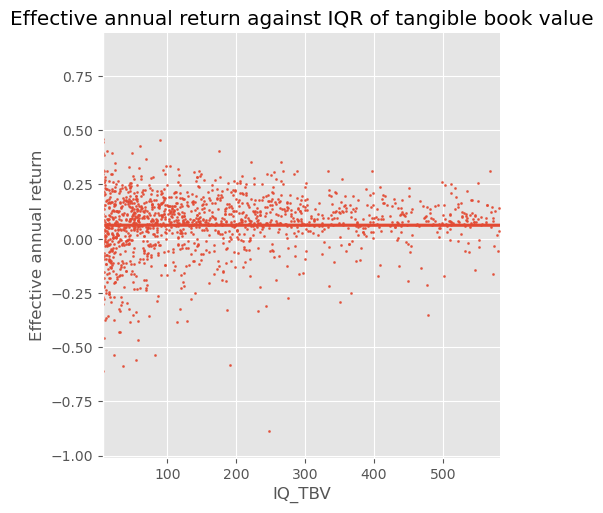

In [69]:
fig=sns.lmplot(x='IQ_TBV', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_TBV'],[25,75]))
fig.set(title='Effective annual return against IQR of tangible book value')

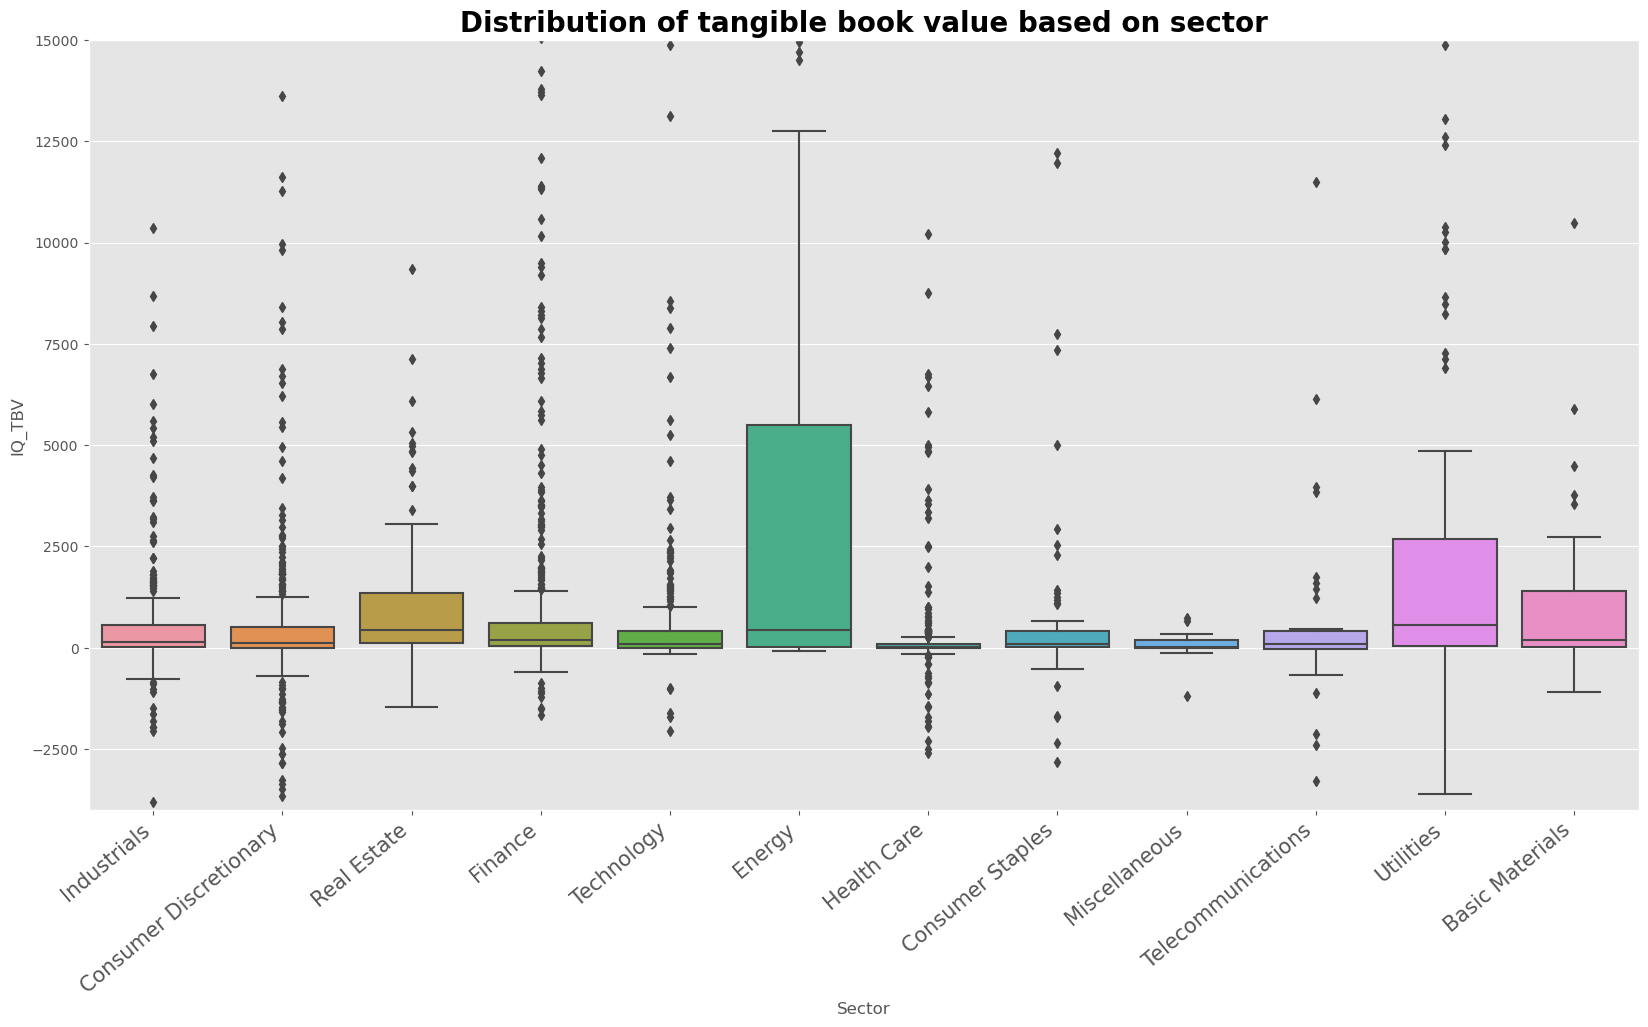

In [72]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_TBV', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-4000,15000)
fig.set_title('Distribution of tangible book value based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against net debt')

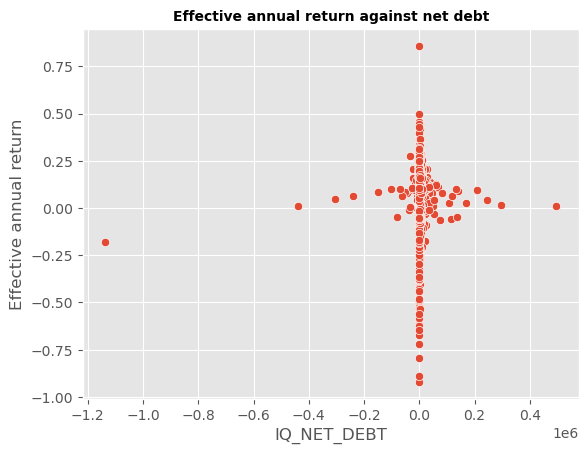

In [73]:
fig=sns.scatterplot(x='IQ_NET_DEBT', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against net debt', fontdict={'size': 10, 'weight': 'bold'})

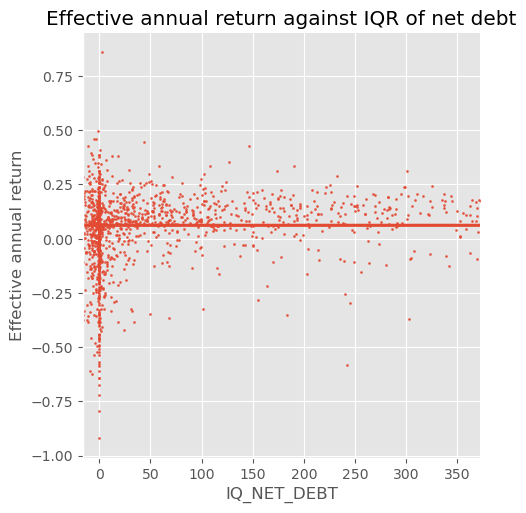

In [74]:
fig=sns.lmplot(x='IQ_NET_DEBT', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_NET_DEBT'],[25,75]))
fig.set(title='Effective annual return against IQR of net debt')

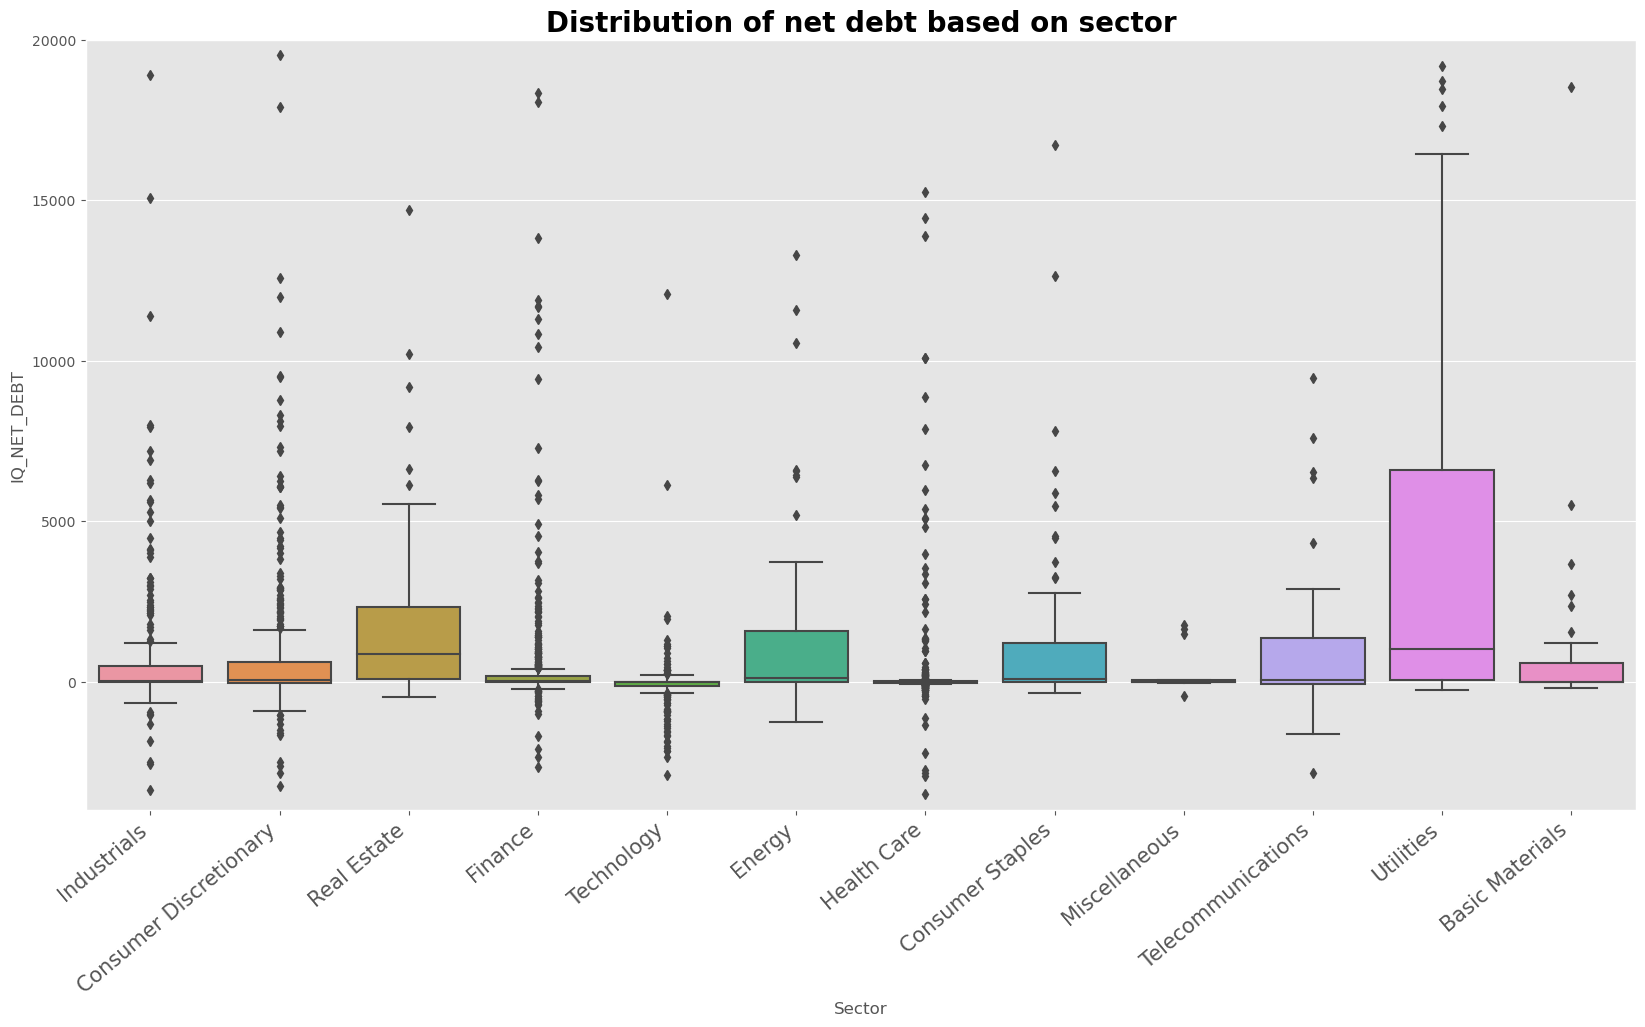

In [76]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_NET_DEBT', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-4000,20000)
fig.set_title('Distribution of net debt based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

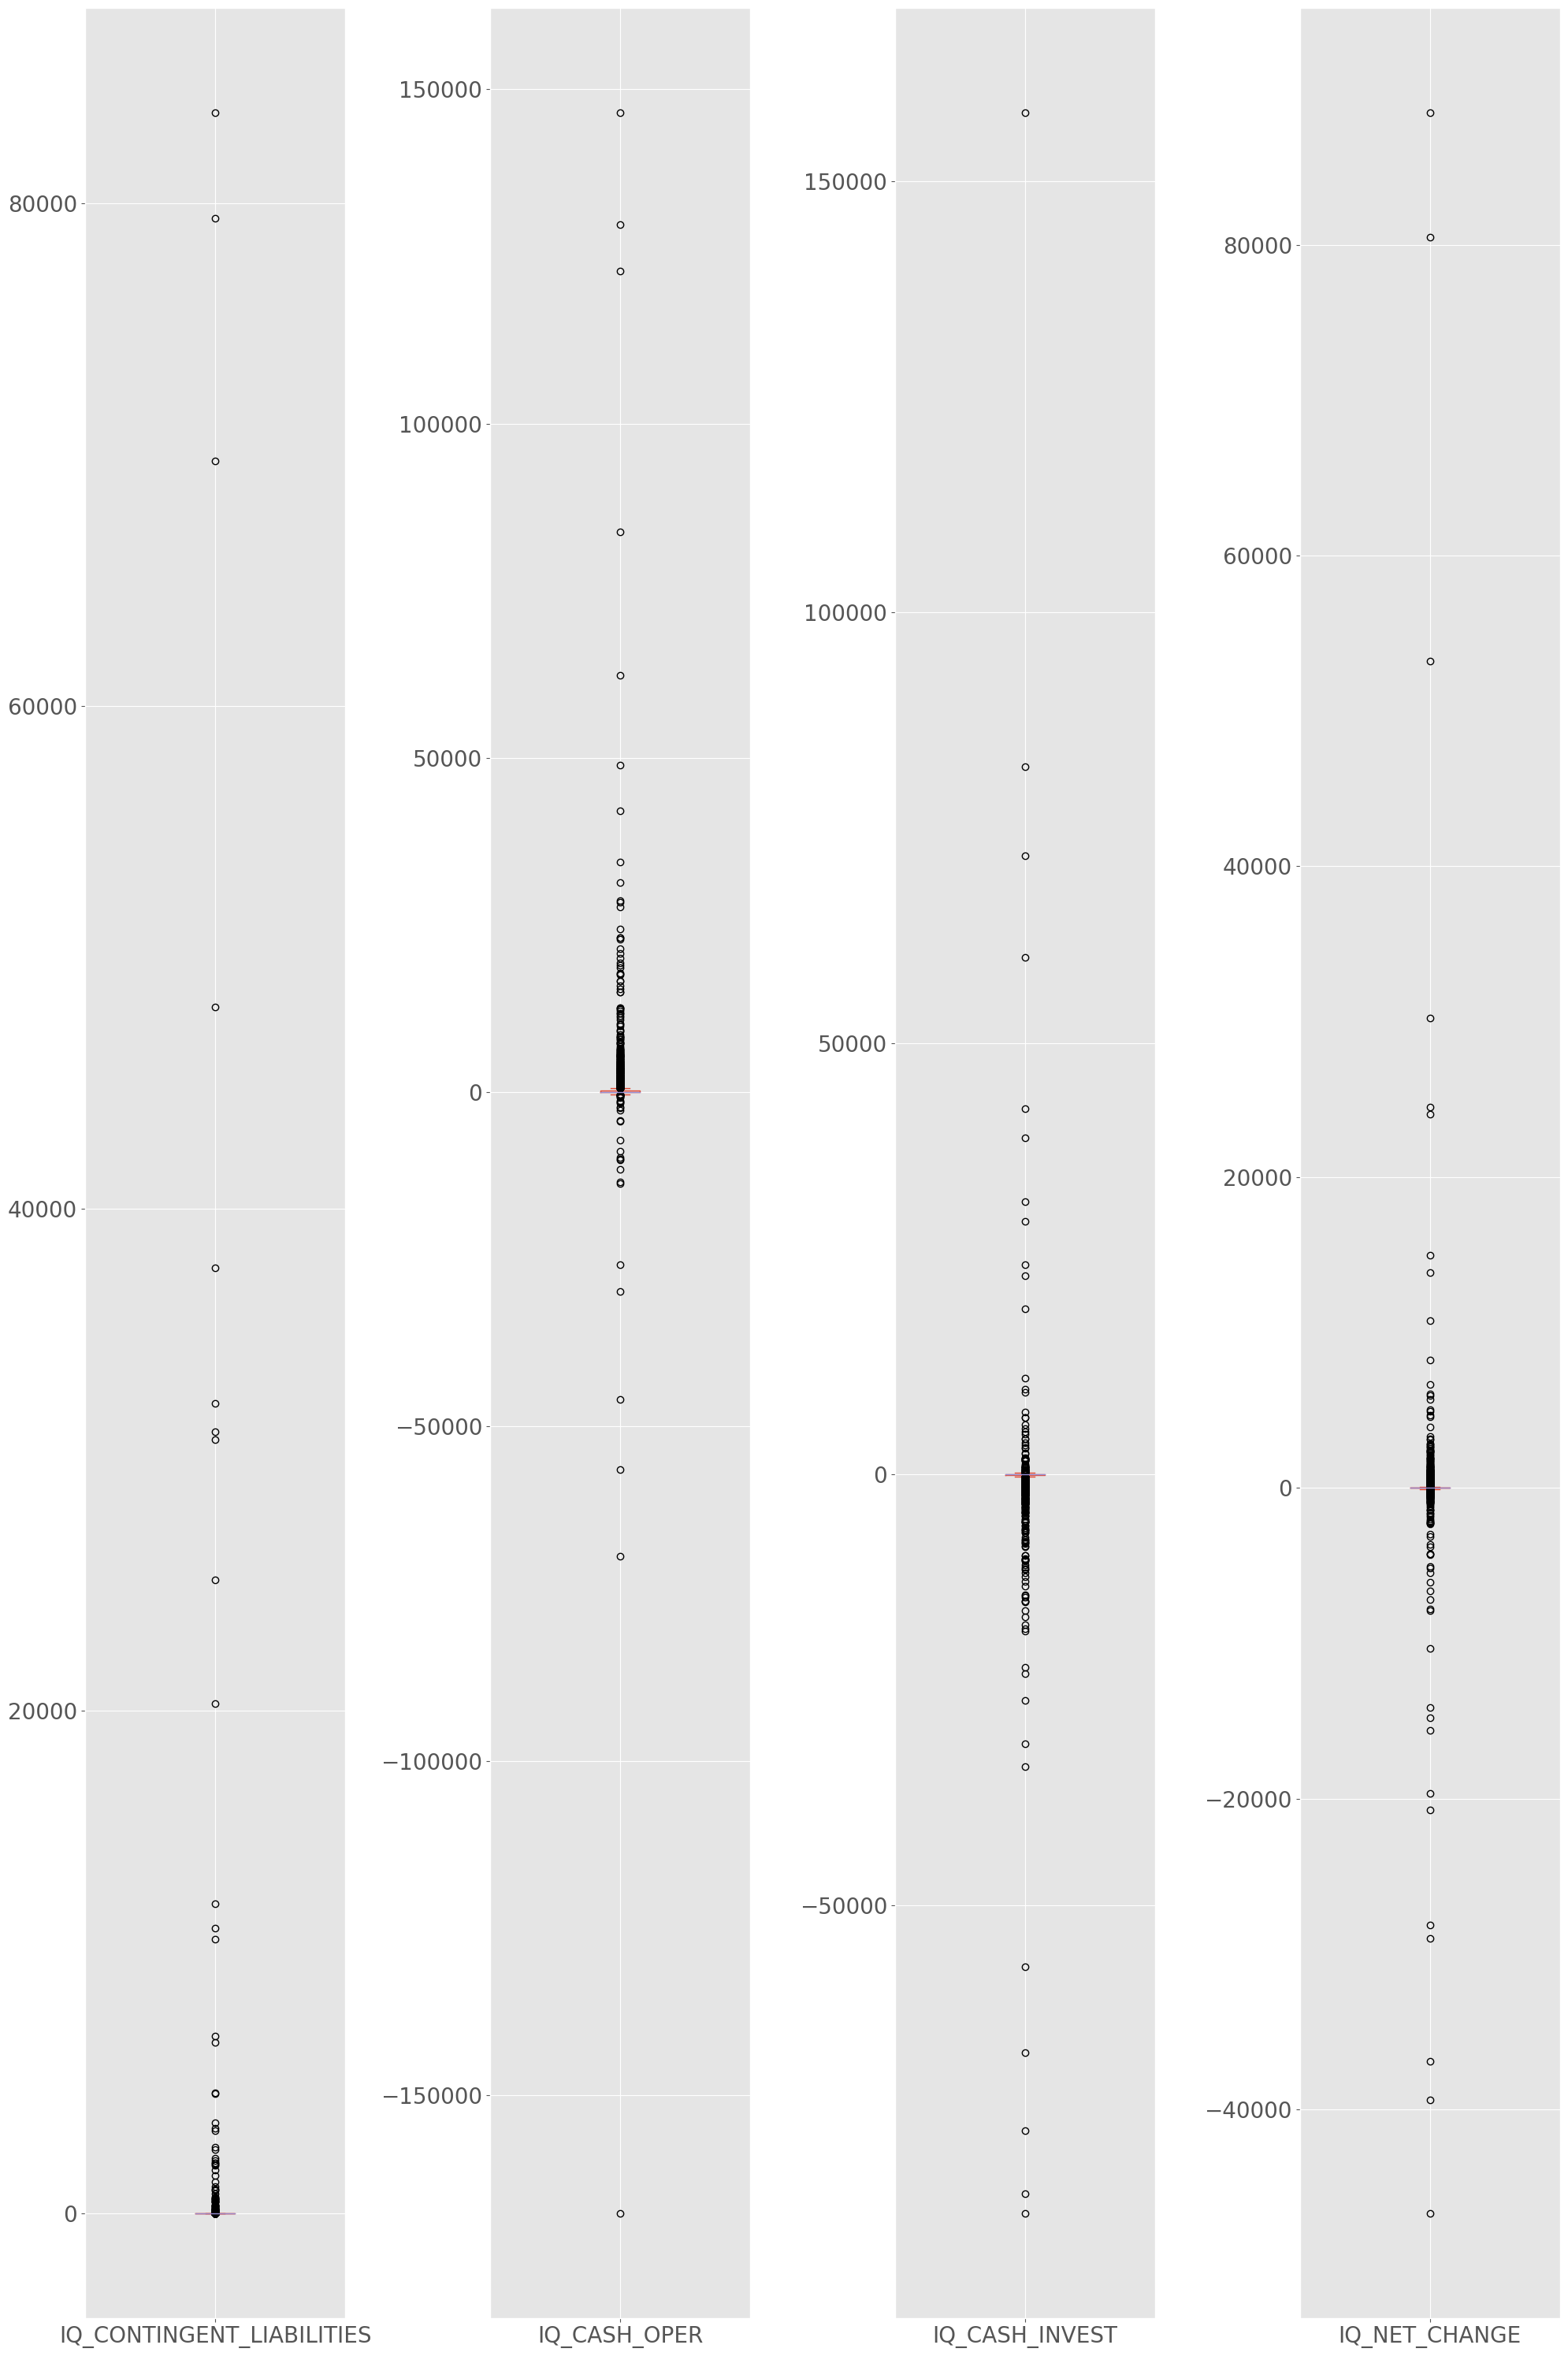

In [32]:
stockdata[['IQ_CONTINGENT_LIABILITIES','IQ_CASH_OPER','IQ_CASH_INVEST','IQ_NET_CHANGE']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Effective annual return against contingent liabilities')

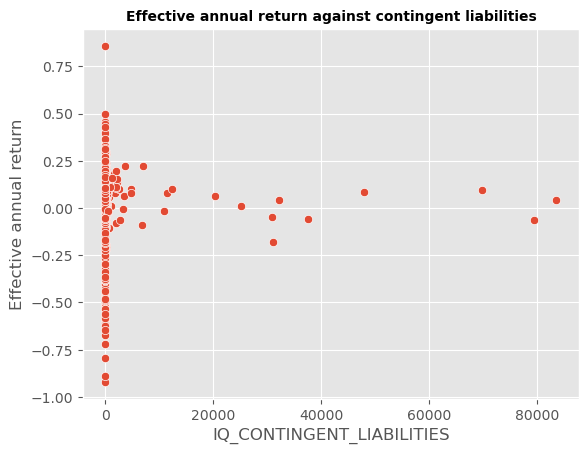

In [77]:
fig=sns.scatterplot(x='IQ_CONTINGENT_LIABILITIES', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against contingent liabilities', fontdict={'size': 10, 'weight': 'bold'})

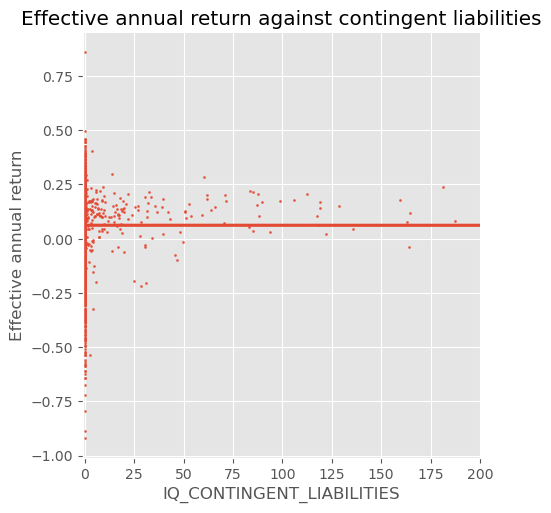

In [86]:
fig=sns.lmplot(x='IQ_CONTINGENT_LIABILITIES', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=(-1,200))
fig.set(title='Effective annual return against contingent liabilities')

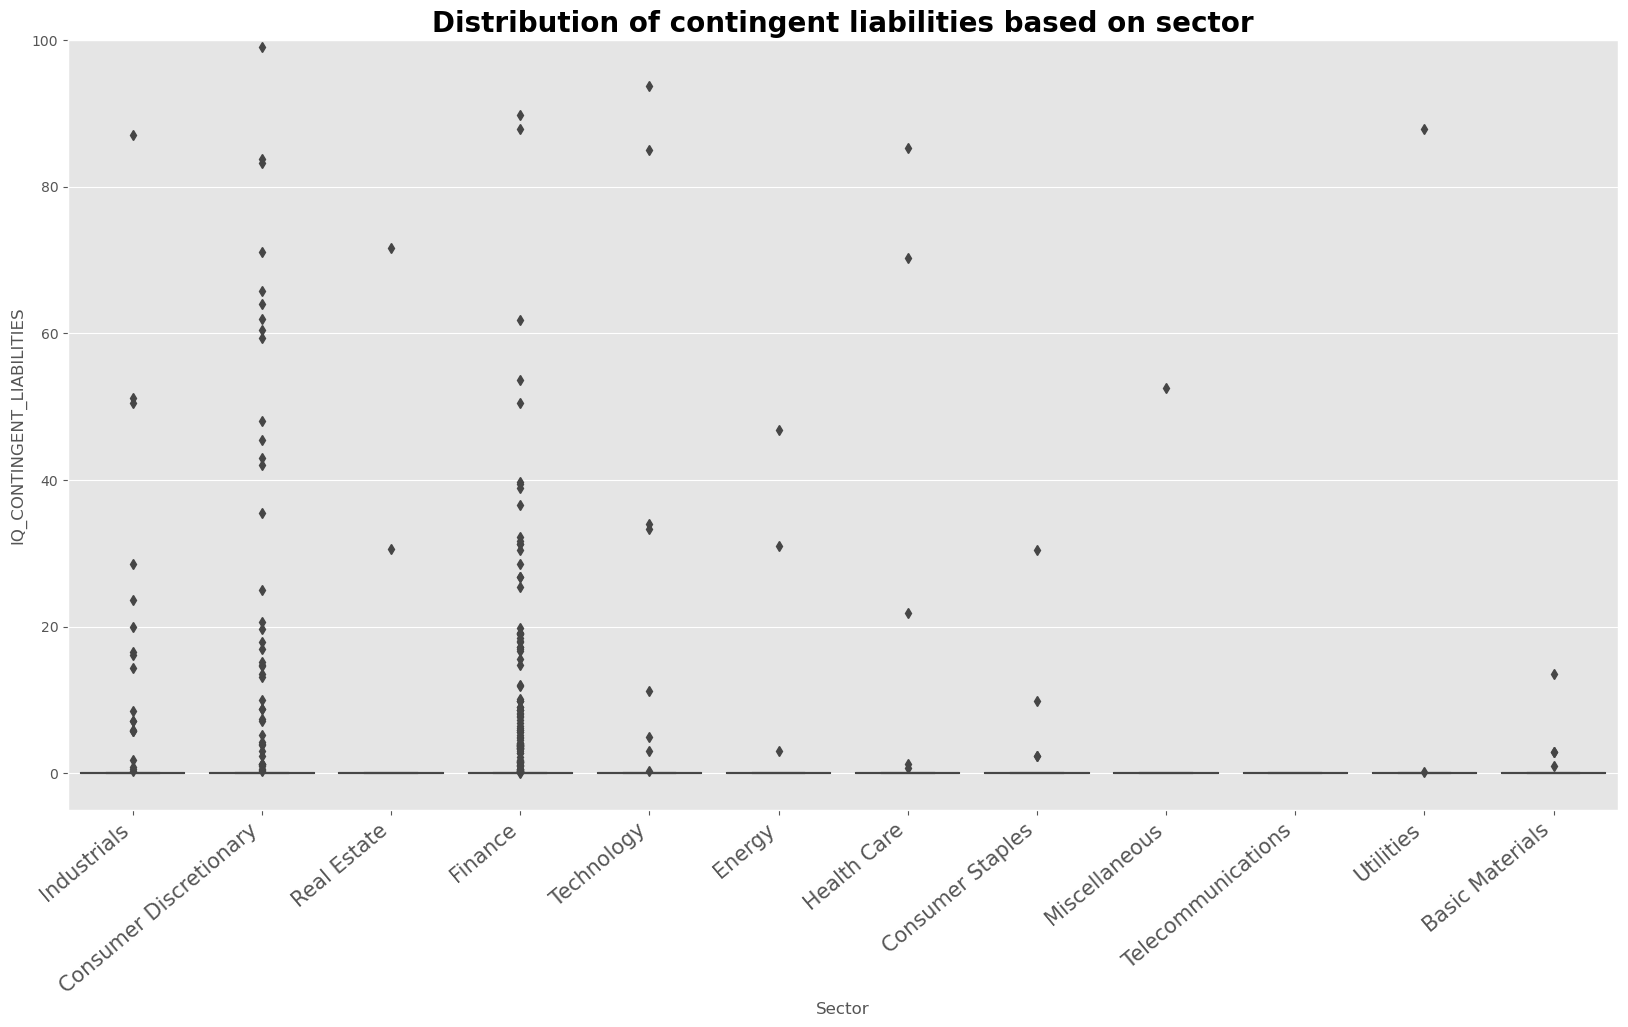

In [85]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_CONTINGENT_LIABILITIES', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-5,100)
fig.set_title('Distribution of contingent liabilities based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against cash flow from operations')

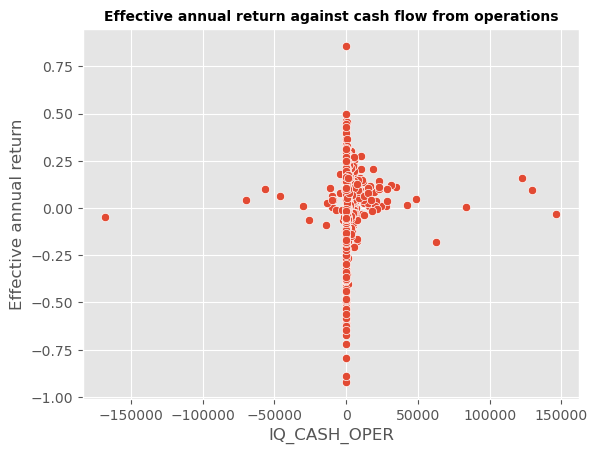

In [87]:
fig=sns.scatterplot(x='IQ_CASH_OPER', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against cash flow from operations', fontdict={'size': 10, 'weight': 'bold'})

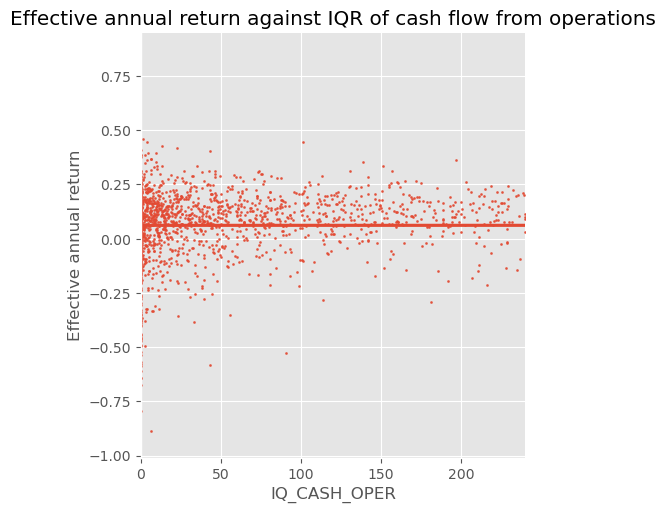

In [89]:
fig=sns.lmplot(x='IQ_CASH_OPER', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_CASH_OPER'],[25,75]))
fig.set(title='Effective annual return against IQR of cash flow from operations')

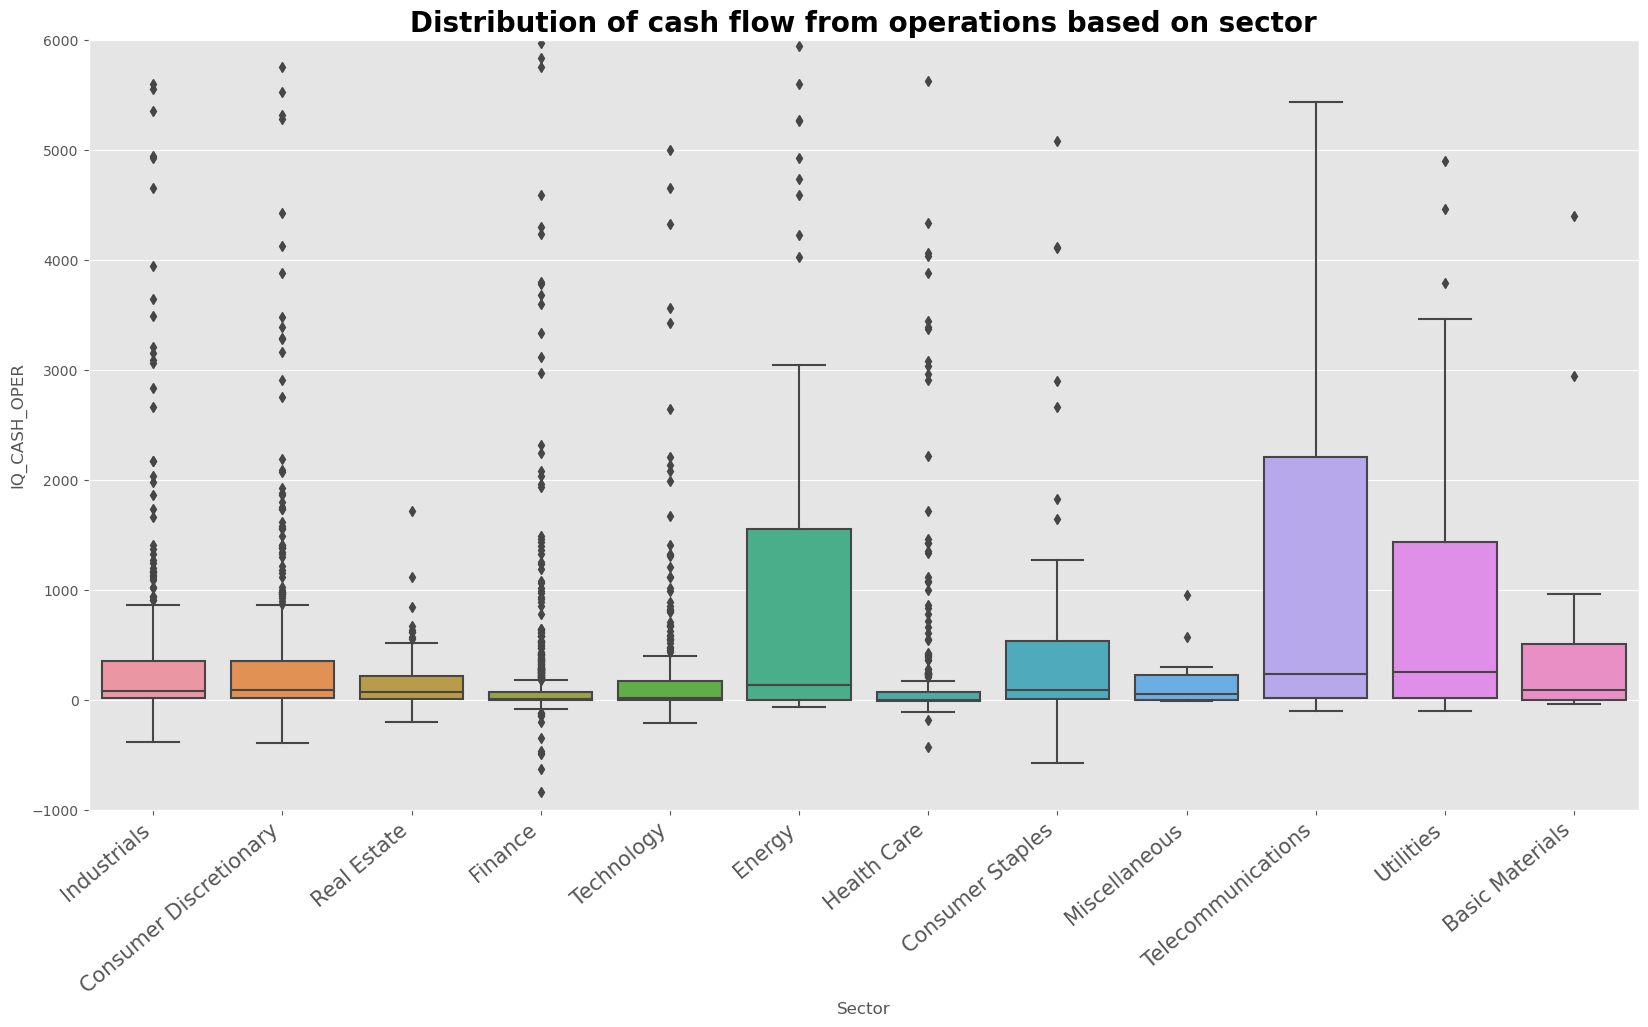

In [92]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_CASH_OPER', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-1000,6000)
fig.set_title('Distribution of cash flow from operations based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against cash flow from investing')

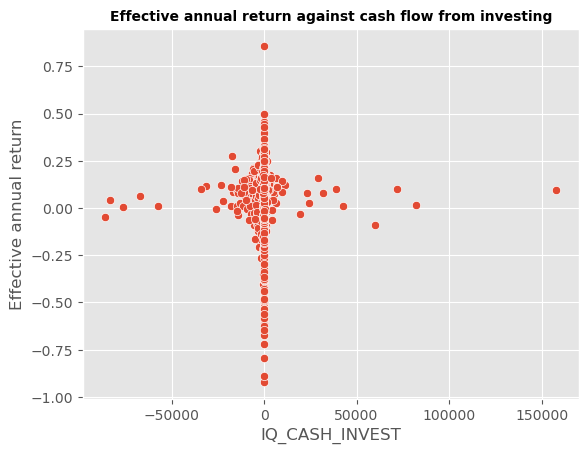

In [93]:
fig=sns.scatterplot(x='IQ_CASH_INVEST', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against cash flow from investing', fontdict={'size': 10, 'weight': 'bold'})

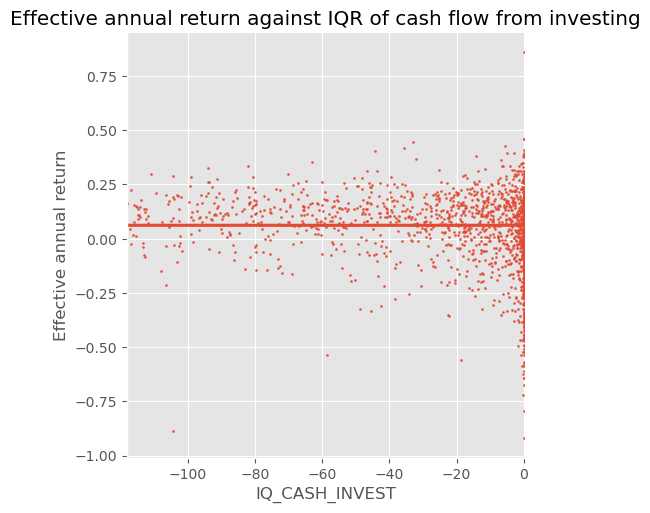

In [94]:
fig=sns.lmplot(x='IQ_CASH_INVEST', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_CASH_INVEST'],[25,75]))
fig.set(title='Effective annual return against IQR of cash flow from investing')

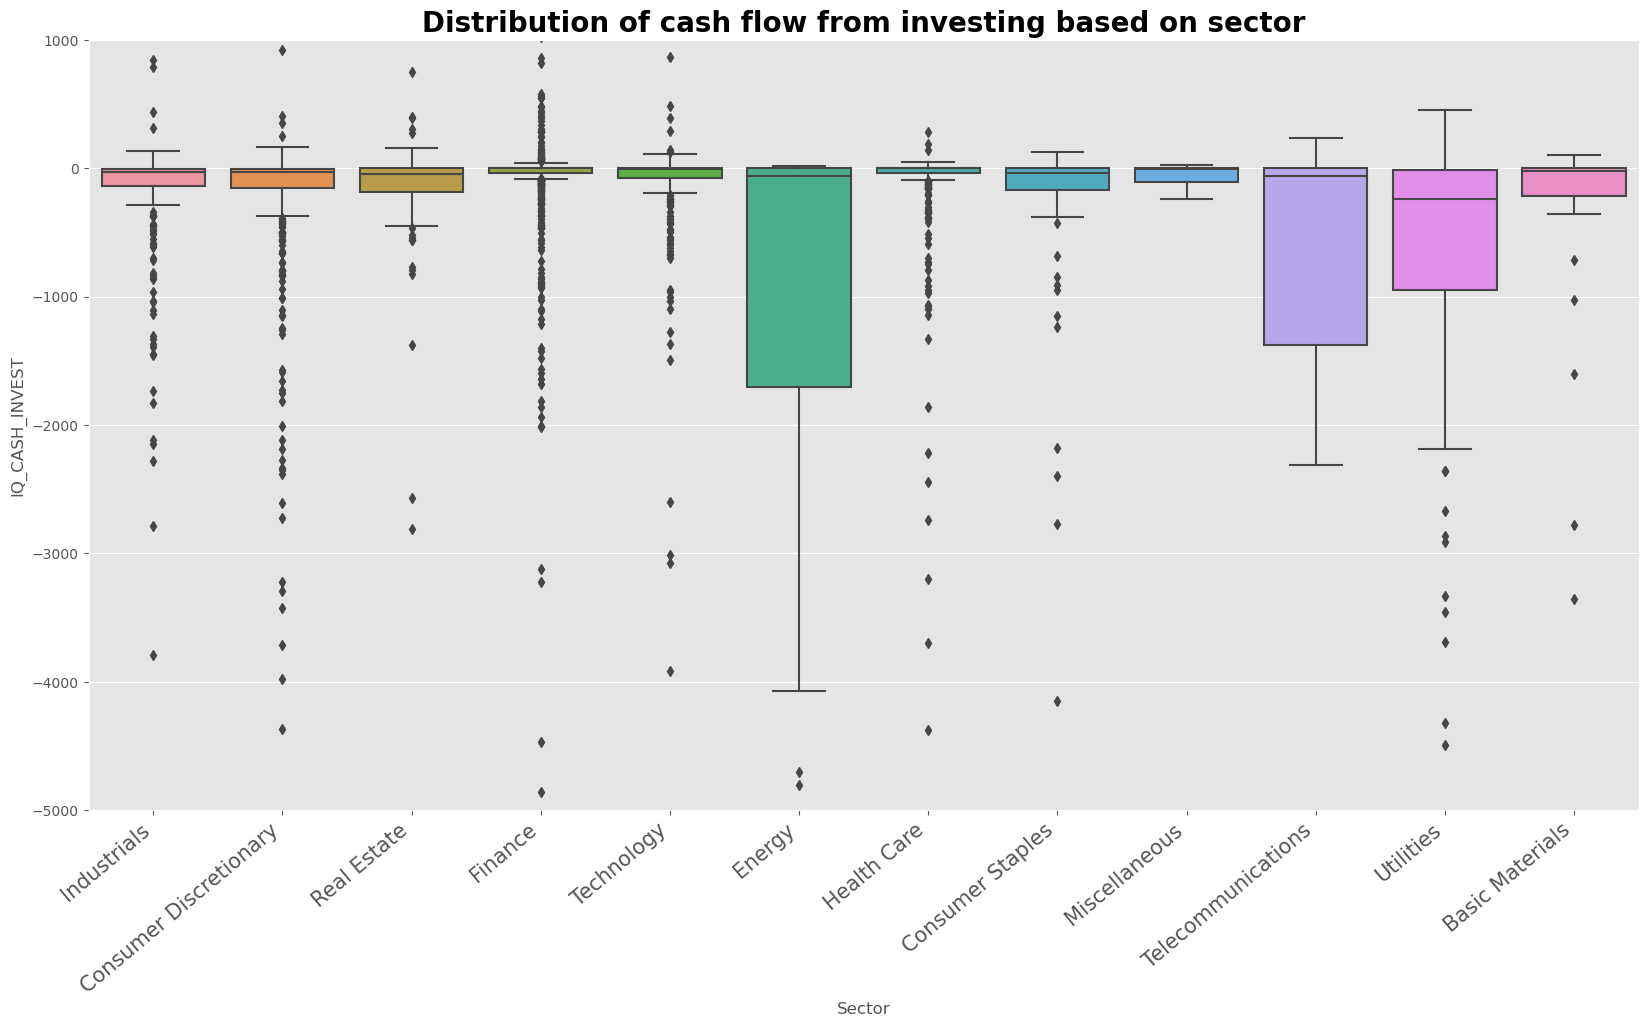

In [96]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_CASH_INVEST', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-5000,1000)
fig.set_title('Distribution of cash flow from investing based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against net change in cash')

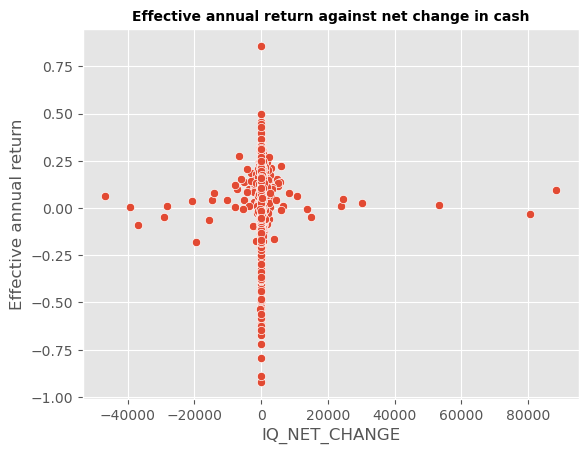

In [97]:
fig=sns.scatterplot(x='IQ_NET_CHANGE', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against net change in cash', fontdict={'size': 10, 'weight': 'bold'})

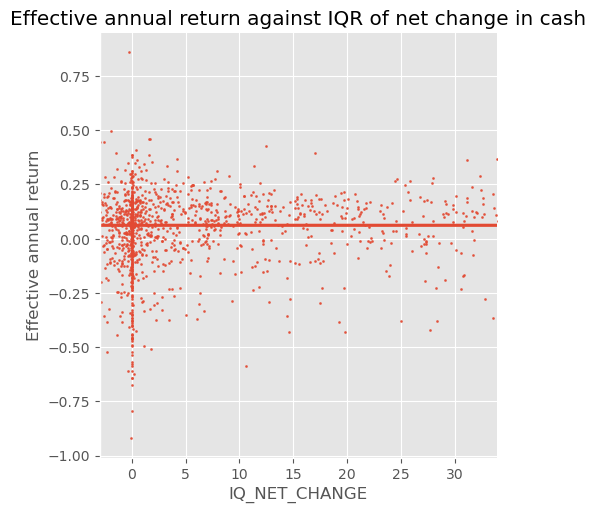

In [98]:
fig=sns.lmplot(x='IQ_NET_CHANGE', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_NET_CHANGE'],[25,75]))
fig.set(title='Effective annual return against IQR of net change in cash')

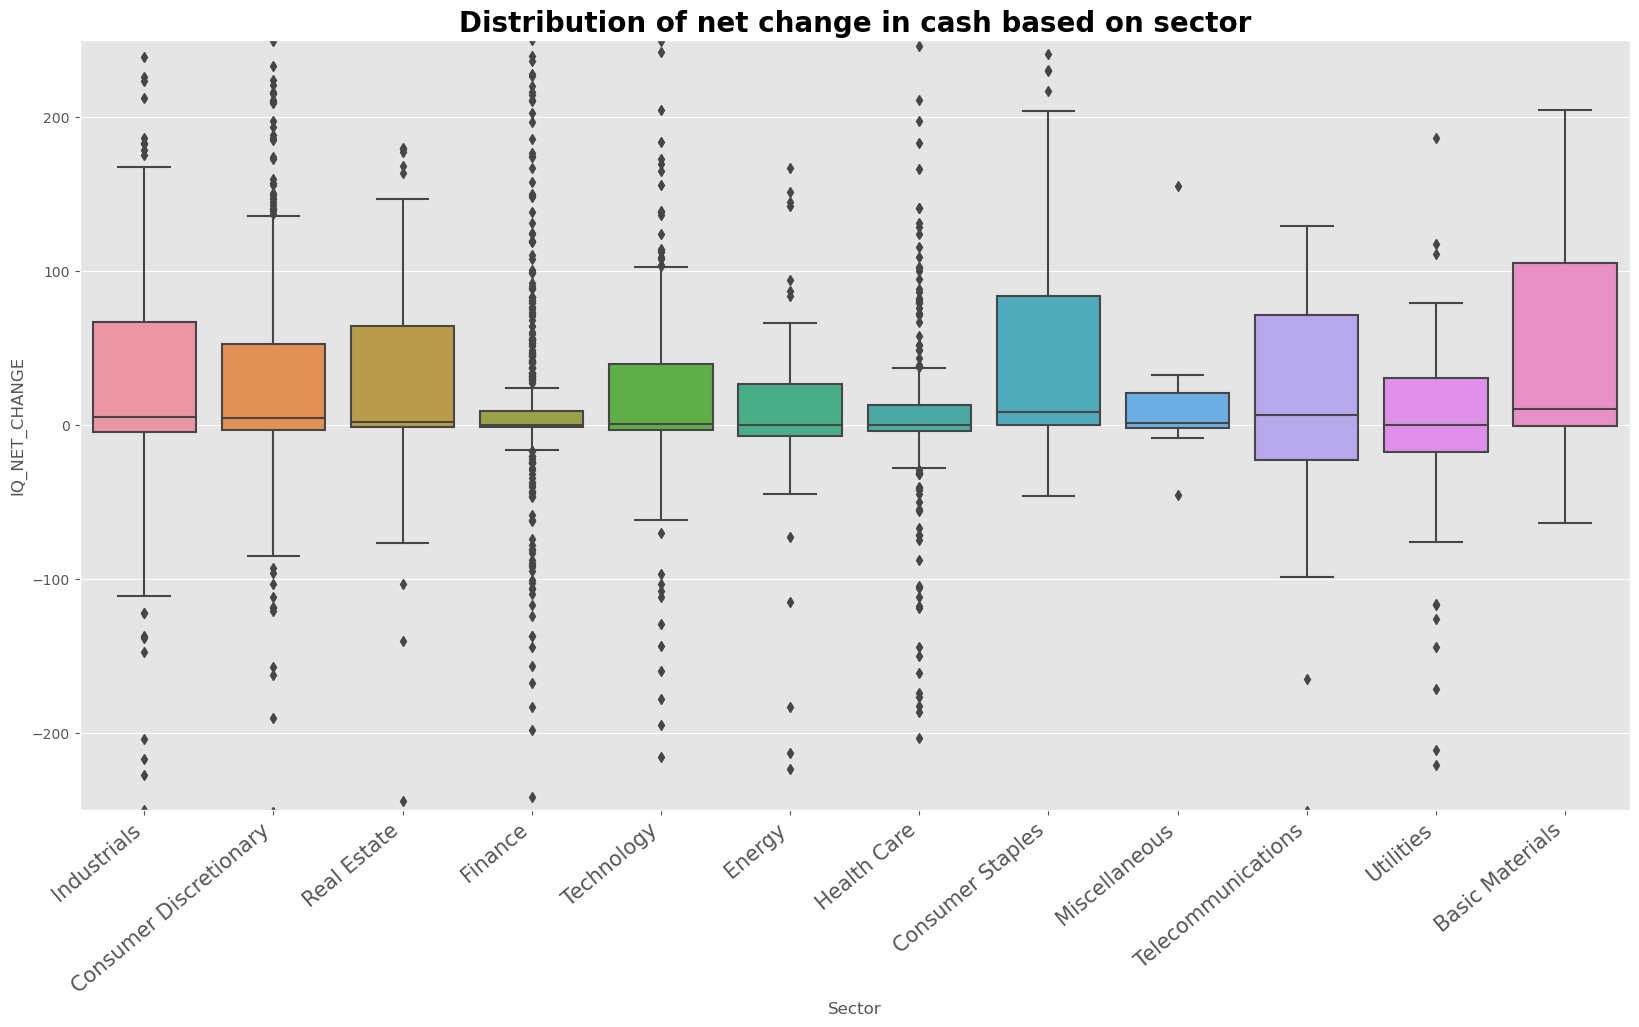

In [102]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_NET_CHANGE', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-250,250)
fig.set_title('Distribution of net change in cash based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()